# Analysis of Marijuana Usage Habits

Group Members: Michael Gomes (1644868), Chloë Smith (1877342), Tristan Le Forestier (1835635), Matthew Kruger (1669326)

Contributions by members: 
* Michael Gomes - Data Wrangling.
* Chloë Smith - Executive summary and brief introduction.
* Tristan Le Forestier - Exploratory analyses.
* Matthew Kruger - Found the initial dataset, data description and graphing.

## Table Of Contents:

* [Executive Summary](#Executive-Summary)
* [Introduction](#Introduction)
* [Data Description](#Data-Description)
* [Data Wrangling](#Data-Wrangling)
* [Exploratory Analysis](#Exploratory-Analysis)
    
## Executive Summary <a class="anchor" id="Executive-Summary"></a>

Purpose: The purpose of this Notebook is to investigate cannabis consumption characteristics of the population of South Africa. 

Modelling: Since modelling has not been done yet, but will be done in the second block. We hope to model cannabis consumption using linear regression and logistic regression models for various consumption patterns of the population. We would also like to investigate relationships between the variables in our investigation.

Results: At current we note that as income increases, cannabis consumption decreases to an extent. It begins to increase after a certain income threshold is reached. We also note that cannabis consumption within the provinces with sometimes small population areas having comparatively higher consumption. Furthermore, as income increases the quality of cannabis becomes higher.

Limitations: The dataset is relatively small, and there are some proportionality issues with the gender, location and demographics of the survey participants. Considering the somewhat sensitive topic as well, there is the issue of willingness to answer the survey, and possible human error or inaccurate information skewing the results. Cannabis consumption is also taboo amongst older, more conservative individuals, thus a majority of participants are younger than 30. We also note that small towns in some provinces make up most of the consumption for a province. 

## Introduction <a class="anchor" id="Introduction"></a>

Problem Context: With cannabis consumption being a hotly debated article, it is important to understand the consumption characteristics. Given that the South African government frequently discusses the possibility of using cannabis as an export crop (see [Draft National Cannabis Master Plan](https://www.businessinsider.co.za/draft-national-cannabis-master-plan-2021-4)). Furthermore, with global sentiment on cannabis consumption becoming normalised (see [Virgina Legalisation](https://www.nbcwashington.com/news/local/marijuana-legalization-in-virginia-what-you-need-to-know/2637422/), [Canada Canabis Regulations Summarised](https://leafipedia.net/marijuana-laws/canada/) and [Cannabis Laws In Germany](https://medium.com/nordicoil/cannabis-laws-in-germany-2019-how-to-obtain-legal-cannabis-8e81b012baa1)) it is important to understand the behaviour around cannabis consumption.

Motivation: By understanding the consumption characteristics in South Africa, we can hope to better understand a once taboo topic. Through the knowledge of these consumption characteristics, we can identify target markets for economic benefits. Given the rising popularity and increasing decriminalisation of cannabis in South Africa this market is expected to continue expanding. This should allow for a highly competitive local cannabis market that can be turned into a formal business and thus boost the economy.

Research Questions: 
* Do increases in income lead to consumption of higher quality cannabis?
* Are certain age groups more likely to consume cannabis with higher frequency than other groups?
* Is there a relation between low-income groups and higher cannabis consumption - in grams or frequency?
* Is there a relationship between the price paid for various qualities of cannabis with other variables - such as grams?

Overview of Methodology: At current given that the project is only at the half way point, we will describe the methodologies relevant at current. First, we will validate the data to ensure that there is a standardised format. Then data quality analysis, will be carried out to ensure that data is of a sufficient standard. From here we will tidy the data set. Then we will use one-hot encoding of the categorical variables. This will allow us to use it in the modelling section in second block. For now, we will explore the data set looking for trends that we will expand on in second block.

Hypothesis Test: Our null hypothesis is that "Higher income leads to a decrease in cannabis consumption."

## Toggle button to show/hide code cells

### Note: Code is toggled hidden by default

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Data Description <a class="anchor" id="Data-Description"></a>
***
#### Origin: The dataset was obtained from DataFirst, run by the university of Cape Town.
#### Content: The dataset consists of features of cannabis consumption by South Africans from various socio-economic groups, provinces, settlment types and racial groups. 
#### Date Collected: The original survery took place in 2017.
#### Collection Method: Primary data collection - it was collected via surverying cannabis users. The survery did not make use of random sampling and instead made use of those who were willing to answer the question so there is potential for self-selection bias.
#### Dataset Size: 2241 datapoints (rows) and 26 features (columns).
#### Date Downloaded: The data set was was downloaded on the 05/03/2021 (5th of March 2021).
***
## Inspecting the data to assess quality and to validlity
The general goal here is to check the general features of the data. Further, we are investigating whether the data follows a standard format, a brief overview of the values the data might take(this will be done by looking through a dataframe's head and tail) and finally evaluating if the data cis able to answer our question.
All tidying of data will be carried out in the section following this.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
np.seterr(all='ignore')
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
pd.set_option('mode.chained_assignment', None)

dataset = pd.read_csv("cdpd-2017-csv.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   q1       2241 non-null   object 
 1   q2       2241 non-null   object 
 2   q3       2241 non-null   object 
 3   q4       2241 non-null   object 
 4   q5       2241 non-null   object 
 5   q6       2241 non-null   object 
 6   q7       2241 non-null   object 
 7   q8       2239 non-null   float64
 8   q9       2199 non-null   float64
 9   q10      2179 non-null   float64
 10  q11      2241 non-null   object 
 11  q12      2241 non-null   object 
 12  q13      2235 non-null   object 
 13  q14_u    2241 non-null   object 
 14  q14_r    2241 non-null   object 
 15  q14_i    2241 non-null   object 
 16  q14_rur  2241 non-null   object 
 17  q14_m    2241 non-null   object 
 18  q14_pnd  2241 non-null   object 
 19  q15      0 non-null      float64
 20  q16      2236 non-null   float64
 21  q17      2241 

The above shows the variable types and the number of null or non-null answers for each respective question.
Investigating this we hope to see that there exists an entry that is non-null for most of our data set.

***

Below we will investigate in more detail some characteristics of the data set in order to validate it.

In [3]:
sex = dataset.iloc[:,1].unique()
print("Sex in the survey")
print(sex)
print("###############")

incomeBrackets = dataset.iloc[:,4].unique()
print("Income brackets")
print(incomeBrackets)
print("###############")
provinces = dataset.iloc[:,11].unique()
print("Provinces in Survery")
print(provinces)
print("###############")
ethnicGroups = dataset.iloc[:,2].unique()
print("Ethnicities in the Survery")
print(ethnicGroups)
print("###############")
ages = dataset.iloc[:,3].unique()
print("Age groups in the Survey")
print(ages)
print("###############")

Sex in the survey
['Male' 'Female' 'I would prefer not to answer' '.']
###############
Income brackets
['R5000-R9999' 'R10 000- R14 999' '< R1000 (less than R1000)'
 'R20 000- R24 999' 'R1000- R4999' 'R15 000- R19 999' 'R30 000 and above'
 'R25 000- R29 999' '.']
###############
Provinces in Survery
['Gauteng' 'KwaZulu-Natal' 'Limpopo' 'Mpumalanga' 'North West'
 'The Eastern Cape' 'The Free State' 'The Northern Cape'
 'The Western Cape' '.']
###############
Ethnicities in the Survery
['Other' 'I would prefer to not answer' 'White' '.' 'African' 'Indian'
 'Coloured' 'Asian']
###############
Age groups in the Survey
['< 20 years (younger than 20 years)' '30-39 years' '20-29 years'
 '50 years and above' '.' '40-49 years']
###############


***
#### Validations:
* The data's format is consistent as can be seen above.
* The data set consists entirely of either objects or floats.
* There exists parts of the data set that are null. These will be removed later in Tidying of Data.
* There is sufficient data in the other columns in order to make inferences.

* We an also see that in general we have captured various segments of the South African Population.
* We have both male and female respondents, various income groups, people from various provinces, various ethnic groups and different age brackets.
* Thus the data set corresponds to what we would expect for a survey of South Africa.
***
#### Inspecting the data quality
Here we will see how many of the data points are null.


<BarContainer object of 27 artists>

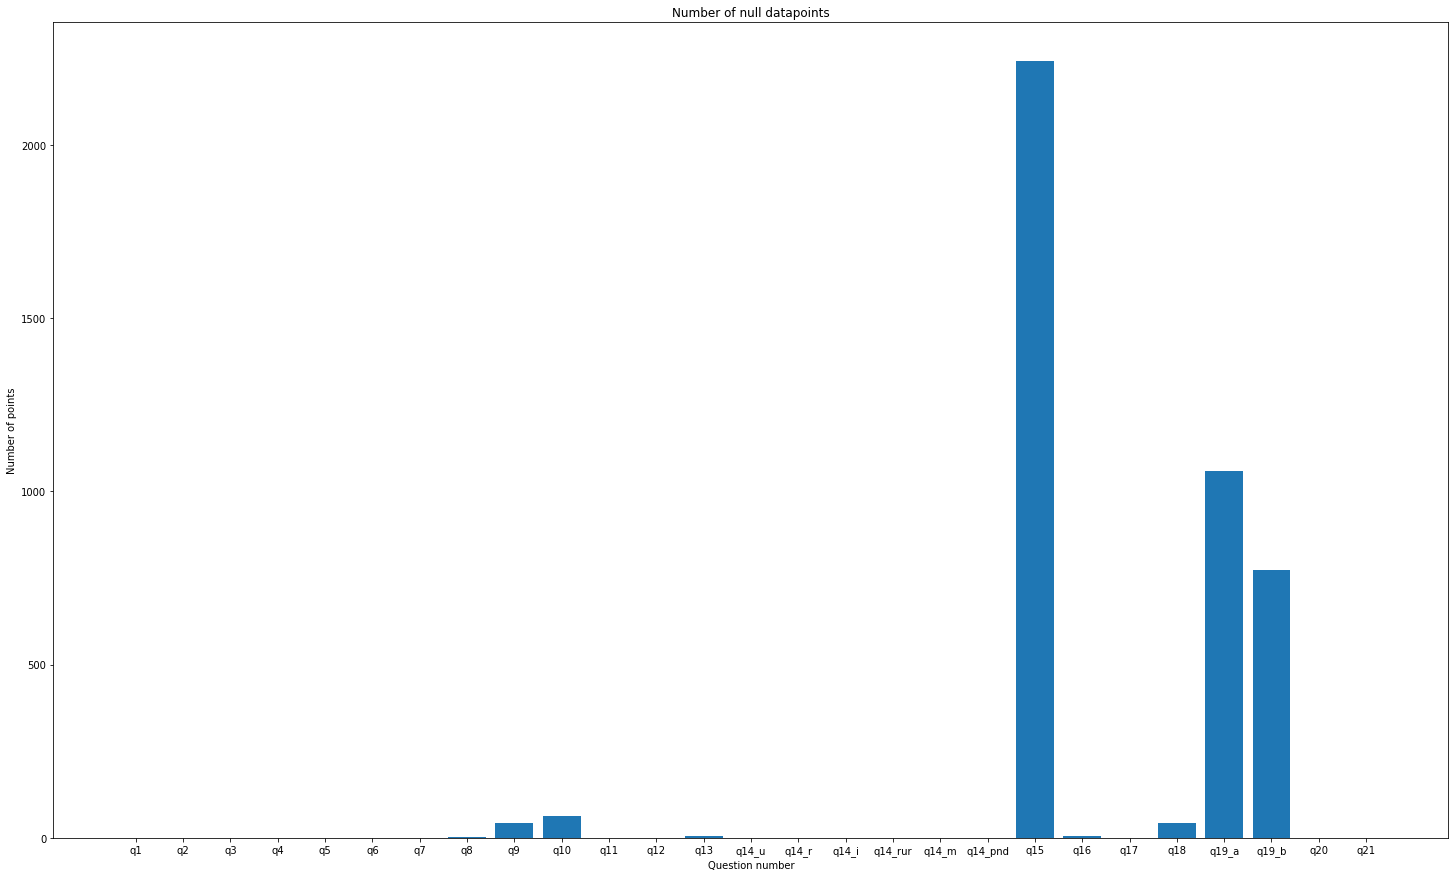

In [4]:
nanInfo = dataset.isnull().sum()
names = ["q1","q2","q3","q4","q5","q6","q7","q8","q9","q10","q11","q12","q13","q14_u","q14_r","q14_i","q14_rur","q14_m","q14_pnd","q15","q16","q17","q18","q19_a","q19_b","q20","q21"]


plt.figure(figsize=(25,15))
plt.title("Number of null datapoints")
plt.xlabel("Question number")
plt.ylabel("Number of points")
plt.bar(names,nanInfo)

Next we will investigate the mix of ethnicities in the data.

Here we can see that the data set in general contains information for each question. Filling in the NANs will be carried out in Tidying of Data. Question 15 will be removed from the data set in Tidying of Data given that there are no responses for this question. 

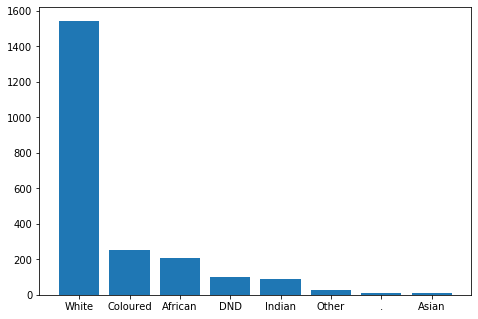

In [5]:
data = dataset.iloc[:,2].value_counts().to_numpy()
#Race is in the order : white, coloured, african, I would prefer not to say, Indian, other, . , asian
race = ["White", "Coloured", "African", "DND", "Indian", "Other", ".", "Asian"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(race,data)
plt.show()

Here we can see that we have an over representation of White and Coloured people in the survey. With very few of the respondents being African.
Given the population makeup of South Africa this does limit the survey in how it captures the South African population's consumption habits of cannabis.
DND and "." just represent the two cases from the original survey where the respondents chose to not identify their race.

Male                            1606
Female                           615
I would prefer not to answer      18
.                                  2
Name: q2, dtype: int64


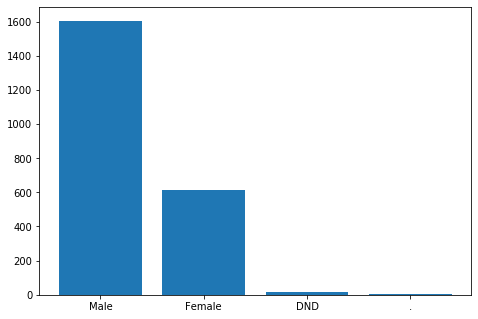

In [6]:
sex = dataset.iloc[:,1].value_counts()
print(sex)
sexLabels = ["Male", "Female", "DND", "."]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sexLabels,sex)
plt.show()

DND and "." represent the cases were the respondent did not wish to give their sex.
In the above graph we can see that we have an over representation of men in the survey.


Next we will investigate the first hundred data points and the last hundred datapoints to get an overall view of the data's quality.

In [7]:
#First 100 data points
dataset.head(100)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q14_m,q14_pnd,q15,q16,q17,q18,q19_a,q19_b,q20,q21
0,I consent,Male,Other,< 20 years (younger than 20 years),R5000-R9999,2-3 times per week,2-3 times per week,5.0,200.0,10.0,...,.,.,NaN,10.0,2,Yes,10.000000,250.0,No,Yes
1,I consent,Male,I would prefer to not answer,30-39 years,R10 000- R14 999,Everyday,Once per month (or less),16.0,500.0,8.0,...,.,.,NaN,10.0,More than 30 days,Yes,50.000000,205.0,No,No
2,I consent,Female,I would prefer to not answer,20-29 years,R10 000- R14 999,Everyday,2-3 times per month,6.0,500.0,10.0,...,.,.,NaN,6.0,30,Yes,NaN,130.0,No,No
3,I consent,Male,White,20-29 years,R5000-R9999,2-3 times per week,Once per month (or less),10.0,200.0,5.0,...,.,.,NaN,10.0,More than 30 days,Yes,10.869565,150.0,No,Yes
4,I consent,Female,White,< 20 years (younger than 20 years),< R1000 (less than R1000),2-3 times per month,Once per month (or less),4.0,400.0,6.0,...,.,.,NaN,8.0,14,Yes,50.000000,100.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,I consent,Male,White,20-29 years,R10 000- R14 999,2-3 times per month,2-3 times per month,7.0,400.0,4.0,...,.,.,NaN,8.0,2,Yes,80.000000,120.0,No,Yes
96,I consent,Female,White,20-29 years,R1000- R4999,Everyday,Once per week,6.0,50.0,5.0,...,.,.,NaN,5.0,5,No,NaN,NaN,Yes,No
97,I consent,Female,White,30-39 years,R30 000 and above,Once per week,Once per month (or less),9.0,600.0,2.0,...,.,.,NaN,5.0,More than 30 days,No,NaN,NaN,Yes,No
98,I consent,Female,White,20-29 years,R15 000- R19 999,2-3 times per month,Once per month (or less),10.0,300.0,5.0,...,.,.,NaN,10.0,More than 30 days,Yes,29.444445,200.0,I do not wish to disclose this information,No


In [8]:
#Last 100 data points
dataset.tail(100)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q14_m,q14_pnd,q15,q16,q17,q18,q19_a,q19_b,q20,q21
2141,I consent,Female,White,< 20 years (younger than 20 years),R10 000- R14 999,Everyday,Once per week,6.0,150.0,10.0,...,.,.,NaN,5.0,10,Yes,9.000000,100.000000,Yes,No
2142,I consent,Male,White,20-29 years,R15 000- R19 999,Everyday,Once per month (or less),10.0,1000.0,605.0,...,.,.,NaN,5.0,More than 30 days,Yes,NaN,120.000000,Yes,No
2143,I consent,Male,White,20-29 years,R1000- R4999,Everyday,2-3 times per month,7.0,700.0,40.0,...,.,.,NaN,10.0,30,Yes,14.285714,200.000000,Yes,No
2144,I consent,Male,White,20-29 years,R20 000- R24 999,2-3 times per week,2-3 times per month,8.0,150.0,1.0,...,.,.,NaN,5.0,5,No,NaN,NaN,Yes,No
2145,I consent,Male,White,20-29 years,< R1000 (less than R1000),Everyday,2-3 times per week,3.0,50.0,2.5,...,.,.,NaN,9.0,3,Yes,15.000000,98.666664,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,I consent,Male,I would prefer to not answer,30-39 years,R10 000- R14 999,Everyday,I do not wish to disclose this information,20.0,0.0,0.0,...,true,.,NaN,10.0,1,Yes,NaN,NaN,I do not wish to disclose this information,No
2237,I consent,Male,White,40-49 years,R30 000 and above,2-3 times per month,I do not wish to disclose this information,20.0,NaN,0.0,...,.,true,NaN,10.0,More than 30 days,Yes,NaN,NaN,.,No
2238,I consent,Female,White,50 years and above,R15 000- R19 999,2-3 times per month,I do not wish to disclose this information,3.0,NaN,10.0,...,.,.,NaN,10.0,More than 30 days,Yes,NaN,NaN,Yes,No
2239,I consent,Male,Coloured,30-39 years,R30 000 and above,Everyday,.,15.0,NaN,9000.0,...,true,.,NaN,5.0,More than 30 days,No,NaN,NaN,No,No


***
#### Data Quality Analysis (first 14 questions):
* The surveyed people in the dataset all consented which is what we would expect.
* The data contains very few NaNs (in number ranges) & very few places where no answer was chosen(not specified) represented by '.'. This shows decent quality in the first 14 data points.
* There is a mix of different ethnicities, genders and locations.
* The size of purchase (in grams) and the price of the entire purchase (ZAR) indicate that most people are consumers - since the price and quantity is smaller.
* It does seem however a few dealers may be in the dataset. These entries that may be possible dealers can be seen at index 2240 and 2239 where the users claimed they purchased 1000 grams and 9000 grams respectively. Given that there are very few dealers in the overall data set this does not affect the data set's quality enough to be concerned.
* The top two provinces make sense given their population size.
* There are some cases where people intentionally gave intentionally incorrect answers.
* Most of these errors are spelling mistakes or are colloquialisms, which is easy to fix.
* It should be noted that the survey seems to mainly capture the cannabis habits and purchasing information of predominantly White South Africans.
* Furthermore, it should be noted that there is an overrepresentation of men in the survey.
***
#### Note to reader going further for q14_:
* u indicates urban
* r indicates residential
* i indicates industrial
* rur indicates rural
* m indicates mixed
* pnd indicates not disclosed

***
Since these above tags refer to the type of settlement the user comes from, it is of interest to investigate.
It should provide us an overall idea of cannabis consumptions for people living in different areas and specifically population densities.
It also helps us to see if the data is truly representative given that most people should be living in urban and residential areas.
      
***

In [9]:
tot = 0
pnd = 0
for i in range(13,19):
    col = dataset.iloc[:,i].value_counts()
    print(col)
    if i != 18:
        tot = tot + col.to_numpy()[1]
    else:
        pnd = col.to_numpy()[1]
    print("----------------------------------------------------------------------------")
    
print("The total of the answered settlement types is " + str(tot))
tot = tot+pnd
print("Which with the people who chose not to answer gives a total of " + str(tot))

.       1658
true     583
Name: q14_u, dtype: int64
----------------------------------------------------------------------------
true    1155
.       1086
Name: q14_r, dtype: int64
----------------------------------------------------------------------------
.       2221
true      20
Name: q14_i, dtype: int64
----------------------------------------------------------------------------
.       2185
true      56
Name: q14_rur, dtype: int64
----------------------------------------------------------------------------
.       2000
true     241
Name: q14_m, dtype: int64
----------------------------------------------------------------------------
.       2074
true     167
Name: q14_pnd, dtype: int64
----------------------------------------------------------------------------
The total of the answered settlement types is 1986
Which with the people who chose not to answer gives a total of 2153


***
#### Further Data Quality Analysis on Settlements:
* Most people live in places we would expect them to i.e residential areas and urban zones.
* There does exist a bit of mismatch, as there are 88 people who did not answer this question at all, however this is a small proportion and is acceptable and can be dealt with in data wrangling.
***
Next we will investigate other consumption habits of cannabis users.
Questions are in order: Ease of access, number of days to consume purchased amount, if the dealer sells different types of cannabis, price of cannabis per gram, if they exclusively use this dealer, if they offer other drugs.

In [10]:
for i in range(19,27):
    col = dataset.iloc[:,i].value_counts()
    print(col)
    print("----------------------------------------------------------------------------")

Series([], Name: q15, dtype: int64)
----------------------------------------------------------------------------
10.0    633
8.0     433
7.0     269
5.0     208
9.0     207
6.0     152
4.0      96
2.0      90
3.0      89
1.0      59
Name: q16, dtype: int64
----------------------------------------------------------------------------
More than 30 days    312
30                   307
7                    282
5                    155
14                   148
2                    148
3                    147
10                   120
4                     89
1                     77
20                    66
25                    59
15                    57
21                    53
6                     52
8                     26
.                     24
12                    24
9                     14
28                    12
16                    10
22                     9
24                     9
17                     9
27                     6
13                     5
26              

***
#### Data Quality Analysis Conclusion:
* The data set seems to be of decent quality overall, with very few missing entries and is a good sample of cannabis usage.
* There do exist some answers with a greater count than anticipated e.g Western Cape has the largest number of cannabis users in this survey.
* Overall the quality of the data set is good and follows standard format with acceptable answers. Where the few errors that do occur such as spelling errors we can rectify them.
    
***
#### Ability to Answer Question:
* The data set contains a varied(in terms of quality, location, income range and usage habits) crowd of users and has decent data quality, so general inferences can be made using the data set.
* The data set also gives a general idea of consumption characterisitcs in the frequency, quantity, quality and price of cannabis.
* Consumption by the average user is also given, as well as the consumption characterisitics for various income ranges.
* Alongside the income ranges given in the data set, characterisitics can be found to answer and substantiate the questions.
* It should also allow us to answer other interesting questions as they appear further into the analysis of consumption characteristics.

***
#### Limitations in our Ability to Answer the Question
* As can be seen in the racial breakdown, this survey underrepresents African South Africans whilst overrepresenting White South Africans. This limits the ability to answer the questions about the cannabis usage in South Africa as a whole. 
* Another issue with the dataset is the overrepresentation of the Western Cape. This is possibly due to the fact that the survey was conducted by UCT(University of Cape Town). This makes the trends and answers to our question more true to the Western Cape area however, this limits how valid these findings may be with regards to South Africa as a whole. Thus the findings that are presented and the conclusions we reach may not hold true for the entire population of South Africa.
* Futhermore, given that there is an overrepresentation of men in the survey this further limits our ability to answer the question.
***

#### Summarising the Above
* Although there does exist limitations of the survey with regards to some the sample group's characteristics, we still feel confidence that some inferences made using this sample group will carry over to the general population. To the extent of how much it carries over is difficult to determine.


## Data Wrangling <a class="anchor" id="Data-Wrangling"></a>

#### Tidying of the dataset

In some instances, we can see that survey participants left their answers blank when there was a possible option where they did not have to disclose their data at all. There are examples of this happening as seen in the total counts above for the following columns: q2, q3, q6, q7, q20 and q21. The data where people just did not answer are represented by "." as shown above as well in the total counts. We will just rectify this issue by changing these records to the appropriate answer where they did not have to disclose their data.

In [11]:
dataset['q2'].loc[dataset['q2'] == '.'] = 'I would prefer not to answer'
dataset['q3'].loc[dataset['q3'] == '.'] = 'I would prefer to not answer'
dataset['q6'].loc[dataset['q6'] == '.'] = 'I do not wish to disclose this information'
dataset['q7'].loc[dataset['q7'] == '.'] = 'I do not wish to disclose this information'
dataset['q20'].loc[dataset['q20'] == '.'] = 'I do not wish to disclose this information'
dataset['q21'].loc[dataset['q21'] == '.'] = 'I do not wish to disclose this information'

When looking at the dataset we can see for every record, the column regarding q15(Data when purchase took place) is blank (NaN). This is further backed up by the total counts of the column in the section above. Thus, we remove this column in its entirety as it adds no value to the dataset as it is empty.

In [12]:
print(dataset['q15'])
del dataset['q15']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2236   NaN
2237   NaN
2238   NaN
2239   NaN
2240   NaN
Name: q15, Length: 2241, dtype: float64


Put data in to an undisclosed category if no data was provided for that specific question or if the person did not wish to answer that question.

In [13]:
dataset['q2'].loc[dataset['q2'] == 'I would prefer not to answer'] = 'Undisclosed'
dataset['q3'].loc[dataset['q3'] == 'I would prefer to not answer'] = 'Undisclosed'
dataset['q4'].loc[dataset['q4'] == '.'] = 'Undisclosed'
dataset['q5'].loc[dataset['q5'] == '.'] = 'Undisclosed'
dataset['q6'].loc[dataset['q6'] == 'I do not wish to disclose this information'] = 'Undisclosed'
dataset['q7'].loc[dataset['q7'] == 'I do not wish to disclose this information'] = 'Undisclosed'
dataset['q11'].loc[dataset['q11'] == '.'] = 'Undisclosed'
dataset['q13'].loc[dataset['q13'] == '.'] = 'Undisclosed'
dataset['q17'].loc[dataset['q17'] == '.'] = 'Undisclosed'
dataset['q18'].loc[dataset['q18'] == '.'] = 'Undisclosed'
dataset['q20'].loc[dataset['q20'] == 'I do not wish to disclose this information'] = 'Undisclosed'
dataset['q21'].loc[dataset['q21'] == 'I do not wish to disclose this information'] = 'Undisclosed'

This helps us to change the datatype of the settlements to the correct datatype later on in the tidying process. We will want to make all the columns pertaining to the settlements of type Boolean later. Thus, we set the values of the data with '.' to the empty string so once converted they become False.

In [14]:
dataset['q14_u'].loc[dataset['q14_u'] == '.'] = ''
dataset['q14_u'].loc[dataset['q14_u'] == 'true'] = 'True'
dataset['q14_r'].loc[dataset['q14_r'] == '.'] = ''
dataset['q14_r'].loc[dataset['q14_r'] == 'true'] = 'True'
dataset['q14_i'].loc[dataset['q14_i'] == '.'] = ''
dataset['q14_i'].loc[dataset['q14_i'] == 'true'] = 'True'
dataset['q14_rur'].loc[dataset['q14_rur'] == '.'] = ''
dataset['q14_rur'].loc[dataset['q14_rur'] == 'true'] = 'True'
dataset['q14_m'].loc[dataset['q14_m'] == '.'] = ''
dataset['q14_m'].loc[dataset['q14_m'] == 'true'] = 'True'
dataset['q14_pnd'].loc[dataset['q14_pnd'] == '.'] = ''
dataset['q14_pnd'].loc[dataset['q14_pnd'] == 'true'] = 'True'

Remove records seen while checking the data beforehand where the people said they grew their own marijuana. Their data would not be useful as they then obviously would not buy marijuana from other people and we need that information for this investigation. 

In [15]:
i = dataset[((dataset['q12'] == '.') & (dataset['q13'] == 'Grow my own'))].index
dataset = dataset.drop(i)

i = dataset[dataset['q13'] == 'I grow my own'].index
dataset = dataset.drop(i)

i = dataset[dataset['q13'] == "I don't purchase"].index
dataset = dataset.drop(i)

##### Fixing city/town data

Try sort out any inconsistencies with people who said they reside in the Western Cape. As seen below from what is printed out, there are multiple spelling errors in this category. Also, people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [16]:
print("WESTERN CAPE DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Western Cape'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'cape town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape Twon')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'CApe Town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cpt')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Table view/cape town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape Towm')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape Town Milnerton')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'City Bowl')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Sunningdale')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Newlands')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cappe town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape towm')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Athlone')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Elsies River')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Woodstock, cape town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Plumstead')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Athlone, Cape Town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Rosebank, Cape Town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape Town, Obs')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'EdgemeadTableview')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Monte Vista')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'northern suburbs')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Ocean View')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Blouberg')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'City Centre')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Woodstock cape town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Rondebosch,Cape Town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Hout bay')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'CThasshittyweed')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Plattekloof CPT')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape flats')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Southern Suburbs')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape Town city')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Table View, Cape Tow')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'City')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cake Town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Philipi')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Vanguard Estate')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Sea point Cape Town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Sea Point')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'CT')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'CPT')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Claremont')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Capetown')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Observatory')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Parow')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Century City')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Southern suburbs')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Northern suburbs')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'capetown')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Tableview')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Table View')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Goodwood')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'CapeTown')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'CAPE TOWN')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Wynberg')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Ceres wc')] = 'Ceres'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Bellville&Rustenburg')] = 'Bellville'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Belleville')] = 'Bellville'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Belville')] = 'Bellville'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Somerset West or Ron')] = 'Somerset West'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Somerset west')] = 'Somerset West'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Helderberg')] = 'Somerset West'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'WILDERNESS')] = 'Wilderness'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'overberg')] = 'Overberg'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'george')] = 'George'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Simons town')] = 'Simons Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Plettenberg bay')] = 'Plettenberg Bay'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == "Mitchell's plain")] = "Mitchell's Plain"
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Gordons bay')] = 'Gordons Bay'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'oudtshoorn')] = 'Oudtshoorn'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Mossel bay')] = 'Mossel Bay'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Nyanga, Cape Town')] = 'Nyanga'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Noordhoek/Cape Town')] = 'Noordhoek'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Mosselbay')] = 'Mossel Bay'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'knysna')] = 'Knysna'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'durbanville')] = 'Durbanville'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'hermanus')] = 'Hermanus'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'STELLENBOSCH')] = 'Stellenbosch'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == '7600')] = 'Stellenbosch'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Stellenbosh')] = 'Stellenbosch'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Stellenbsoch')] = 'Stellenbosch'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Stellies')] = 'Stellenbosch'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Fish Hoek and Ottery')] = 'Fish Hoek'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Fish hoek')] = 'Fish Hoek'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Kuilsriver')] = 'Kuils River'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'many dif places')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Yeah no')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'mxm')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'everywhere')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Everywhere ')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Everywhere')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Shopping mall')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'None of yr business')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape of Good Dope')] = 'Undisclosed'

#when people provide two cities/towns then duplicate record but change the province and/or city/town so both are covered
multAnswer = dataset.loc[dataset['q13'] == 'Stellenbosch/cpt'].copy()
multAnswer['q13'] = 'Cape Town'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Stellenbosch'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Stellenbosch/cpt'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Cape Town & PE'].copy()
multAnswer['q12'] = 'The Western Cape'
multAnswer['q13'] = 'Cape Town'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q12'] = 'The Eastern Cape'
multAnswer['q13'] = 'Port Elizabeth'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Cape Town & PE'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'CPT/Stellenbosch'].copy()
multAnswer['q13'] = 'Cape Town'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Stellenbosch'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'CPT/Stellenbosch'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Cape Town Stellenbo'].copy()
multAnswer['q13'] = 'Cape Town'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Stellenbosch'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Cape Town Stellenbo'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'MosselbayGeorge'].copy()
multAnswer['q13'] = 'Mossel Bay'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'George'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'MosselbayGeorge'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Worcester and Knysna'].copy()
multAnswer['q13'] = 'Worcester'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Knysna'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Worcester and Knysna'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Plett-Knysna'].copy()
multAnswer['q13'] = 'Plettenberg Bay'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Knysna'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Plett-Knysna'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Cape Town/Paarl'].copy()
multAnswer['q13'] = 'Cape Town'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Paarl'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Cape Town/Paarl'].index
dataset = dataset.drop(i)

print("WESTERN CAPE DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Western Cape'].value_counts())

WESTERN CAPE DATA BEFORE FIXING
Cape Town       526
Cape town        98
Stellenbosch     85
Undisclosed      30
cape town        25
               ... 
Saldanha          1
Everywhere        1
Newlands          1
Cape towm         1
oudtshoorn        1
Name: q13, Length: 144, dtype: int64
-----------------------------------------------------
WESTERN CAPE DATA AFTER FIXING
Cape Town           744
Stellenbosch         94
Undisclosed          38
George               22
Somerset West        16
Bellville            15
Paarl                13
Durbanville          12
Knysna                9
Strand                8
Worcester             7
Hermanus              5
Plettenberg Bay       4
Mossel Bay            4
Garden Route          3
Fish Hoek             3
Muizenberg            3
Oudtshoorn            3
Wilderness            2
Wellington            2
Ceres                 2
Atlantis              2
Kraaifontein          2
Langebaan             2
Rondebosch            2
Kenilworth            2
Ku

Try sort out any inconsistencies with people who said they reside in the Gauteng. As seen below from what is printed out, there are multiple spelling errors in this category. Also, people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [17]:
print("GAUTENG DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'Gauteng'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Jhb')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'JHB')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Joburg')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'joburg')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'JOHANNESBURG')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'johannesburg')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Johanneshurg')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Braamfontein')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Yeoville')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Northcliff')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Jhb normally')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Johennesburg')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Johannesburg Cbd')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Kensington')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'jhb')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Johanessburg')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Johannesburg,')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Greater Joburg')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Malvern')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == "Jo'burg")] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Bruma, East Rand')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Johannesburg South')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Vaal')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Sunninghill')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Braamfontein JHB')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Newtown')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Lonehill')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Pta')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'PTA')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Pretoria East')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'PRETORIA')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Pretoria west')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Pretoria Sunnyside')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Pretoria, Gauteng')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'HatfieldJohannesbu')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Montana')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'pertoria')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'pretoria')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Primrose Germiston')] = 'Germiston'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Kempton Park, JHB')] = 'Kempton Park'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Kempton')] = 'Kempton Park'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Fourways')] = 'Sandton'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'roodepoort')] = 'Roodepoort'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Edenvale JHB')] = 'Edenvale'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Roodepoort Jhb')] = 'Roodepoort'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Albertom')] = 'Alberton'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'midrand')] = 'Midrand'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Kyalami')] = 'Midrand'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Bryanston')] = 'Sandton'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'SANDTON')] = 'Sandton'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Cresta')] = 'Randburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Rivonia')] = 'Sandton'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Phomolong, Tembisa')] = 'Tembisa'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'vanderbijlpark')] = 'Vanderbijlpark'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Ceder, Fourways')] = 'Sandton'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Soweto, Jhb')] = 'Soweto'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Vereeninging')] = 'Vereeniging'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Nope')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'East rand')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Westrand')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Gauteng')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'N.a.')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Courier')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Ekurhuleni')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'All over S.A.')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'All over S.A.')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Wont disclose this')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Confidential.')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Ekhuruleni')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Mind your own busine')] = 'Undisclosed'

#when people provide two cities/towns then duplicate record but change the province and/or city/town so both are covered
multAnswer = dataset.loc[dataset['q13'] == 'Jhb / el/ pe / pta'].copy()
multAnswer['q12'] = 'Gauteng'
multAnswer['q13'] = 'Johannesburg'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q12'] = 'Gauteng'
multAnswer['q13'] = 'Pretoria'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q12'] = 'The Eastern Cape'
multAnswer['q13'] = 'East London'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q12'] = 'The Eastern Cape'
multAnswer['q13'] = 'Port Elizabeth'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Jhb / el/ pe / pta'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Pretoria\JHB'].copy()
multAnswer['q13'] = 'Pretoria'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Johannesburg'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Pretoria\JHB'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Pretoria/JHB'].copy()
multAnswer['q13'] = 'Pretoria'
dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Johannesburg'
dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Pretoria/JHB'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Joburg and Pretoria'].copy()
multAnswer['q13'] = 'Pretoria'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Johannesburg'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Joburg and Pretoria'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Johannesburg/Midrand'].copy()
multAnswer['q13'] = 'Midrand'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Johannesburg'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Johannesburg/Midrand'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Joburg/ Randburg'].copy()
multAnswer['q13'] = 'Randburg'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Johannesburg'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Joburg/ Randburg'].index
dataset = dataset.drop(i)

i = dataset[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == "free seeds cape town")].index
dataset = dataset.drop(i)

print("GAUTENG DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'Gauteng'].value_counts())

GAUTENG DATA BEFORE FIXING
Johannesburg        234
Pretoria            171
Jhb                  20
Randburg             20
Undisclosed          20
                   ... 
Bronkhorstspruit      1
Johanneshurg          1
Edenvale JHB          1
Soweto, Jhb           1
Malvern               1
Name: q13, Length: 103, dtype: int64
-----------------------------------------------------
GAUTENG DATA AFTER FIXING
Johannesburg        305
Pretoria            188
Undisclosed          39
Randburg             22
Sandton              20
Centurion            16
Alberton             13
Benoni               11
Midrand              11
Roodepoort           10
Boksburg             10
Edenvale              7
Vereeniging           7
Kempton Park          7
Krugersdorp           4
Soweto                4
Vanderbijlpark        3
Germiston             2
Westonaria            2
Springs               2
Sebokeng              1
Tsakane               1
Tshwane               1
Randfontein           1
Bronkhorstspruit

Try sort out any inconsistencies with people who said they reside in the Eastern Cape. As seen below from what is printed out, there are multiple spelling errors in this category. Also, people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [18]:
print("EASTERN CAPE DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Eastern Cape'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Port elizabeth')] = 'Port Elizabeth'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'PE')] = 'Port Elizabeth'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'pe')] = 'Port Elizabeth'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Madela Bay')] = 'Port Elizabeth'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Mandela  Bay')] = 'Port Elizabeth'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Nelson Mandela Metro')] = 'Port Elizabeth'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'East london')] = 'East London'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'East lobdon')] = 'East London'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Southernwood')] = 'East London'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'grahamstown')] = 'Grahamstown'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == "Jeffrey's Bay")] = "Jeffreys Bay"
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == "Jeffreys bay")] = "Jeffreys Bay"
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Eastern Cape')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'EC')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Cape town')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Order from gauteng')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Mdumbi, Transkei')] = 'Mdumbi'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Makana')] = 'Makhanda'

print("EASTERN CAPE DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Eastern Cape'].value_counts())

EASTERN CAPE DATA BEFORE FIXING
Grahamstown             64
Port Elizabeth          49
East London             25
Port elizabeth           6
Undisclosed              6
Queenstown               3
PE                       3
Port Alfred              3
Mthatha                  2
East london              2
Eastern Cape             2
Uitenhage                2
Nelson Mandela Metro     1
Cape St Francis          1
Coffee Bay               1
Cape town                1
Southernwood             1
Jeffreys bay             1
Steynsburg               1
Order from gauteng       1
pe                       1
EC                       1
Jeffreys Bay             1
East lobdon              1
Butterworth              1
Flagstaff                1
Jeffrey's Bay            1
Mandela  Bay             1
Makana                   1
Mdumbi, Transkei         1
grahamstown              1
Cookhouse                1
Name: q13, dtype: int64
-----------------------------------------------------
EASTERN CAPE DATA AFTER FI

Try sort out any inconsistencies with people who said they reside in the KwaZulu-Natal. As seen below from what is printed out, there are multiple spelling errors in this category. Also, people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [19]:
print("KWAZULU-NATAL DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'KwaZulu-Natal'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'durban')] = 'Durban'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Verulam, Durban')] = 'Durban'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'La Lucia')] = 'Durban'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Dbn')] = 'Durban'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Kloof')] = 'Durban'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Durban Area')] = 'Durban'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Umbilo')] = 'Durban'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'pmb')] = 'Pietermaritzburg'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Port shepstone area')] = 'Port Shepstone'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Port shepstone')] = 'Port Shepstone'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Richards bay')] = 'Richards Bay'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Richardsbay')] = 'Richards Bay'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Richards-bay')] = 'Richards Bay'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Port edward')] = 'Port Edward'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'umgababa')] = 'Umgababa'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == "Queen's burgh")] = 'Queensburgh'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'No comment')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Will not disclose')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'South Coast KZN')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Purchased online')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Nope')] = 'Undisclosed'

#when people provide two cities/towns then duplicate record but change the province and/or city/town so both are covered
multAnswer = dataset.loc[dataset['q13'] == 'Durban and Pretoria'].copy()
multAnswer['q12'] = 'KwaZulu-Natal'
multAnswer['q13'] = 'Durban'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q12'] = 'Gauteng'
multAnswer['q13'] = 'Pretoria'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Durban and Pretoria'].index
dataset = dataset.drop(i)

print("KWAZULU-NATAL DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'KwaZulu-Natal'].value_counts())

KWAZULU-NATAL DATA BEFORE FIXING
Durban                 94
Pietermaritzburg       14
Undisclosed             6
Ballito                 5
Hillcrest               4
durban                  3
Margate                 2
Richards Bay            2
pmb                     2
Richards bay            2
Howick                  2
Richardsbay             2
Pinetown                2
Stanger                 2
Hibberdene              1
Richards-bay            1
Verulam, Durban         1
umgababa                1
Isipingo                1
Nope                    1
Port shepstone area     1
Ladysmith               1
Mtunzini                1
Durban Area             1
Umlazi                  1
Queen's burgh           1
Port Shepstone          1
Kloof                   1
Purchased online        1
Umkomaas                1
Umbilo                  1
Westville               1
South Coast KZN         1
Dbn                     1
Amanzimtoti             1
Winkelspruit            1
Edendale                1
La Lu

Try sort out any inconsistencies with people who said they reside in the Mpumalanga. As seen below from what is printed out, there are multiple spelling errors in this category. Also, people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [20]:
print("MPUMALANGA DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'Mpumalanga'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'Nelspruit region')] = 'Nelspruit'
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'Emalahleni')] = 'Witbank'
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'Mpumalanga')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'Johannesburg')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'Pienaar SpyJozi')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'White river')] = 'White River'
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'middelburg')] = 'Middelburg'
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'Haxyview')] = 'Hazyview'

print("MPUMALANGA DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'Mpumalanga'].value_counts())

MPUMALANGA DATA BEFORE FIXING
Nelspruit           10
Undisclosed          7
Middelburg           6
Secunda              4
Witbank              2
White river          2
Swaziland            2
Evander              2
Mpumalanga           1
Johannesburg         1
Barberton            1
Lydenburg            1
Haxyview             1
Carolina             1
Nelspruit region     1
Pienaar SpyJozi      1
middelburg           1
White River          1
Emalahleni           1
Name: q13, dtype: int64
-----------------------------------------------------
MPUMALANGA DATA AFTER FIXING
Nelspruit      11
Undisclosed    10
Middelburg      7
Secunda         4
White River     3
Witbank         3
Evander         2
Swaziland       2
Lydenburg       1
Barberton       1
Carolina        1
Hazyview        1
Name: q13, dtype: int64


Try sort out any inconsistencies with people who said they reside in the Free State. As seen below from what is printed out, there are multiple spelling errors in this category. Also, people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [21]:
print("THE FREE STATE DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Free State'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'The Free State') & (dataset['q13'] == 'Bloemfantein')] = 'Bloemfontein'
dataset['q13'].loc[(dataset['q12'] == 'The Free State') & (dataset['q13'] == 'It differs but Bloem')] = 'Bloemfontein'
dataset['q13'].loc[(dataset['q12'] == 'The Free State') & (dataset['q13'] == 'Rocklands')] = 'Bloemfontein'
dataset['q13'].loc[(dataset['q12'] == 'The Free State') & (dataset['q13'] == 'Everywhere')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Free State') & (dataset['q13'] == 'St Francis Bay')] = 'Undisclosed'

print("THE FREE STATE DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Free State'].value_counts())

THE FREE STATE DATA BEFORE FIXING
Bloemfontein            24
Undisclosed              3
Kroonstad                2
Bethlehem                2
Everywhere               1
It differs but Bloem     1
St Francis Bay           1
Virginia                 1
Harrismith               1
Bloemfantein             1
Rocklands                1
Name: q13, dtype: int64
-----------------------------------------------------
THE FREE STATE DATA AFTER FIXING
Bloemfontein    27
Undisclosed      5
Kroonstad        2
Bethlehem        2
Harrismith       1
Virginia         1
Name: q13, dtype: int64


Try sort out any inconsistencies with people who said they reside in the North West. As seen below from what is printed out, there are multiple spelling errors in this category. Also, people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [22]:
print("NORTH WEST DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'North West'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'North West') & (dataset['q13'] == 'Mahikeng')] = 'Mafikeng'
dataset['q13'].loc[(dataset['q12'] == 'North West') & (dataset['q13'] == 'MAHIKENG')] = 'Mafikeng'
dataset['q13'].loc[(dataset['q12'] == 'North West') & (dataset['q13'] == 'Choose not to declar')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'North West') & (dataset['q13'] == 'Cape Town')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'North West') & (dataset['q13'] == 'Stellenbosch')] = 'Undisclosed'

#when people provide two cities/towns then duplicate record but change the province and/or city/town so both are covered
multAnswer = dataset.loc[dataset['q13'] == 'Rustenburg/Potch'].copy()
multAnswer['q13'] = 'Rustenburg'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Potchefstroom'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Rustenburg/Potch'].index
dataset = dataset.drop(i)

print("NORTH WEST DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'North West'].value_counts())

NORTH WEST DATA BEFORE FIXING
Potchefstroom           14
Rustenburg               4
Klerksdorp               3
Undisclosed              2
Cape Town                1
Choose not to declar     1
Carletonville            1
Mafikeng                 1
Brits                    1
MAHIKENG                 1
Stellenbosch             1
Koster                   1
Rustenburg/Potch         1
Name: q13, dtype: int64
-----------------------------------------------------
NORTH WEST DATA AFTER FIXING
Potchefstroom    15
Undisclosed       5
Rustenburg        5
Klerksdorp        3
Mafikeng          2
Brits             1
Koster            1
Carletonville     1
Name: q13, dtype: int64


Try sort out any inconsistencies with people who said they reside in the Northern Cape. As seen below from what is printed out, there are multiple spelling errors in this category. Also, people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [23]:
print("THE NORTHERN CAPE DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Northern Cape'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'The Northern Cape') & (dataset['q13'] == 'KImberley')] = 'Kimberley'
dataset['q13'].loc[(dataset['q12'] == 'The Northern Cape') & (dataset['q13'] == 'Mothibi stad')] = 'Mothibistad'
dataset['q13'].loc[(dataset['q12'] == 'The Northern Cape') & (dataset['q13'] == 'Cape Town')] = 'Undisclosed'

print("THE NORTHERN CAPE DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Northern Cape'].value_counts())

THE NORTHERN CAPE DATA BEFORE FIXING
Undisclosed     7
Upington        2
Kimberley       2
Port Nolloth    1
Mothibi stad    1
Colesberg       1
Cape Town       1
KImberley       1
Kenhardt        1
Name: q13, dtype: int64
-----------------------------------------------------
THE NORTHERN CAPE DATA AFTER FIXING
Undisclosed     8
Kimberley       3
Upington        2
Port Nolloth    1
Mothibistad     1
Colesberg       1
Kenhardt        1
Name: q13, dtype: int64


Try sort out any inconsistencies with people who said they reside in Limpopo. As seen below from what is printed out, there are multiple spelling errors in this category. Also, people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [24]:
print("LIMPOPO DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'Limpopo'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'Limpopo') & (dataset['q13'] == 'Lephalale(ellisras)')] = 'Lephalale'
dataset['q13'].loc[(dataset['q12'] == 'Limpopo') & (dataset['q13'] == 'No')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Limpopo') & (dataset['q13'] == 'Hazyview')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Limpopo') & (dataset['q13'] == 'Middleburg')] = 'Undisclosed'

print("LIMPOPO DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'Limpopo'].value_counts())

LIMPOPO DATA BEFORE FIXING
Polokwane              6
Mokopane               3
Haenertsburg           1
Hazyview               1
Middleburg             1
Letsitele              1
Levubu                 1
Makhado                1
No                     1
Lephalale(ellisras)    1
Phalaborwa             1
Name: q13, dtype: int64
-----------------------------------------------------
LIMPOPO DATA AFTER FIXING
Polokwane       6
Mokopane        3
Undisclosed     3
Haenertsburg    1
Makhado         1
Letsitele       1
Levubu          1
Lephalale       1
Phalaborwa      1
Name: q13, dtype: int64


##### Small city/town grouped data

In this section, we will group all the small towns/cities of each province into their own category for the column corresponding to City/Town. This might be useful later if we want to infer how marijuana habits coming from larger cities/towns differ to that of smaller cities/towns. We will create a copy of the original dataset above and modify the copy. 

In [25]:
smallCityTownDataset = dataset.copy()

Change all small towns/cities data records into one broad Western Cape small places category.

In [26]:
print("WESTERN CAPE DATA BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Western Cape'].value_counts())
print("-----------------------------------------------------")

#taking the cities/towns with the smaller counts of records and putting them into a new small place category
#we leave two or three cities/towns with the most records unchanged
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'George')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Somerset West')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Bellville')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Paarl')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Durbanville')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Knysna')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Strand')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Worcester')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Hermanus')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Mossel Bay')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Plettenberg Bay')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Oudtshoorn')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Garden Route')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Fish Hoek')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Muizenberg')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Kraaifontein')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Kenilworth')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Rondebosch')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Atlantis')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Langebaan')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Wilderness')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Wellington')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Ceres')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Kommetjie')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Tulbagh')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Brackenfell')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Simons Town')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Crossroads')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Kuils River')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Melkbosstrand')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Malmesbury')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Greyton')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Nyanga')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Overberg')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Gordons Bay')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Sedgefield')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Klapmuts')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Winelands')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Velddrif')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Eerste River')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Noordhoek')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == "Mitchell's Plain")] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Vredenburg')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Robertson')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Saldanha')] = 'Small Place WC'

print("WESTERN CAPE DATA AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Western Cape'].value_counts())

WESTERN CAPE DATA BEFORE FIXING SMALL CITYS/TOWNS
Cape Town           744
Stellenbosch         94
Undisclosed          38
George               22
Somerset West        16
Bellville            15
Paarl                13
Durbanville          12
Knysna                9
Strand                8
Worcester             7
Hermanus              5
Plettenberg Bay       4
Mossel Bay            4
Garden Route          3
Fish Hoek             3
Muizenberg            3
Oudtshoorn            3
Wilderness            2
Wellington            2
Ceres                 2
Atlantis              2
Kraaifontein          2
Langebaan             2
Rondebosch            2
Kenilworth            2
Kuils River           1
Nyanga                1
Tulbagh               1
Robertson             1
Eerste River          1
Winelands             1
Melkbosstrand         1
Greyton               1
Vredenburg            1
Saldanha              1
Klapmuts              1
Velddrif              1
Crossroads            1
Overberg      

Change all small towns/cities data records into one broad Gauteng small places category.

In [27]:
print("GAUTENG DATA BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'Gauteng'].value_counts())
print("-----------------------------------------------------")

#taking the cities/towns with the smaller counts of records and putting them into a new small place category
#we leave two or three cities/towns with the most records unchanged
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Randburg')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Sandton')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Centurion')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Alberton')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Benoni')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Midrand')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Roodepoort')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Boksburg')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Edenvale')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Kempton Park')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Vereeniging')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Soweto')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Krugersdorp')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Vanderbijlpark')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Springs')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Westonaria')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Germiston')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Tshwane')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Magaliesburg')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Tsakane')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Brakpan')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Bronkhorstspruit')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Sebokeng')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Tembisa')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Randfontein')] = 'Small Place GP'

print("GAUTENG DATA AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'Gauteng'].value_counts())

GAUTENG DATA BEFORE FIXING SMALL CITYS/TOWNS
Johannesburg        305
Pretoria            189
Undisclosed          39
Randburg             22
Sandton              20
Centurion            16
Alberton             13
Benoni               11
Midrand              11
Roodepoort           10
Boksburg             10
Edenvale              7
Vereeniging           7
Kempton Park          7
Krugersdorp           4
Soweto                4
Vanderbijlpark        3
Germiston             2
Westonaria            2
Springs               2
Sebokeng              1
Tsakane               1
Tshwane               1
Randfontein           1
Bronkhorstspruit      1
Tembisa               1
Magaliesburg          1
Brakpan               1
Name: q13, dtype: int64
-----------------------------------------------------
GAUTENG DATA AFTER FIXING SMALL CITYS/TOWNS
Johannesburg      305
Pretoria          189
Small Place GP    159
Undisclosed        39
Name: q13, dtype: int64


Change all small towns/cities data records into one broad Eastern Cape small places category.

In [28]:
print("EASTERN CAPE DATA BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Eastern Cape'].value_counts())
print("-----------------------------------------------------")

#taking the cities/towns with the smaller counts of records and putting them into a new small place category
#we leave two or three cities/towns with the most records unchanged
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'East London')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Queenstown')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Port Alfred')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Jeffreys Bay')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Uitenhage')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Mthatha')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Steynsburg')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Butterworth')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Cape St Francis')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Coffee Bay')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Makhanda')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Cookhouse')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Flagstaff')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Mdumbi')] = 'Small Place EC'

print("EASTERN CAPE DATA AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Eastern Cape'].value_counts())

EASTERN CAPE DATA BEFORE FIXING SMALL CITYS/TOWNS
Grahamstown        65
Port Elizabeth     61
East London        29
Undisclosed        11
Queenstown          3
Jeffreys Bay        3
Port Alfred         3
Mthatha             2
Uitenhage           2
Makhanda            1
Cape St Francis     1
Mdumbi              1
Flagstaff           1
Coffee Bay          1
Butterworth         1
Steynsburg          1
Cookhouse           1
Name: q13, dtype: int64
-----------------------------------------------------
EASTERN CAPE DATA AFTER FIXING SMALL CITYS/TOWNS
Grahamstown       65
Port Elizabeth    61
Small Place EC    50
Undisclosed       11
Name: q13, dtype: int64


Change all small towns/cities data records into one broad KwaZulu-Natal small places category.

In [29]:
print("KWAZULU-NATAL DATA BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'KwaZulu-Natal'].value_counts())
print("-----------------------------------------------------")

#taking the cities/towns with the smaller counts of records and putting them into a new small place category
#we leave two or three cities/towns with the most records unchanged
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Richards Bay')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Ballito')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Hillcrest')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Port Shepstone')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Stanger')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Pinetown')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Howick')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Margate')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Westville')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Salt Rock')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Isipingo')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Umgababa')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Edendale')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Queensburgh')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Umkomaas')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Hibberdene')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Winkelspruit')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Ladysmith')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Umhlanga')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Umlazi')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Amanzimtoti')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Port Edward')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Mtunzini')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Sodwana Bay')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Newcastle')] = 'Small Place KZN'

print("KWAZULU-NATAL DATA AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'KwaZulu-Natal'].value_counts())

KWAZULU-NATAL DATA BEFORE FIXING SMALL CITYS/TOWNS
Durban              104
Pietermaritzburg     16
Undisclosed          11
Richards Bay          7
Ballito               5
Hillcrest             4
Port Shepstone        3
Howick                2
Stanger               2
Pinetown              2
Margate               2
Port Edward           1
Newcastle             1
Mtunzini              1
Ladysmith             1
Sodwana Bay           1
Umgababa              1
Amanzimtoti           1
Umhlanga              1
Umlazi                1
Isipingo              1
Umkomaas              1
Hibberdene            1
Queensburgh           1
Winkelspruit          1
Edendale              1
Westville             1
Salt Rock             1
Name: q13, dtype: int64
-----------------------------------------------------
KWAZULU-NATAL DATA AFTER FIXING SMALL CITYS/TOWNS
Durban              104
Small Place KZN      44
Pietermaritzburg     16
Undisclosed          11
Name: q13, dtype: int64


Change all small towns/cities data records into one broad Free State small places category.

In [30]:
print("THE FREE STATE BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Free State'].value_counts())
print("-----------------------------------------------------")

#taking the cities/towns with the smaller counts of records and putting them into a new small place category
#we leave two or three cities/towns with the most records unchanged
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Bethlehem')] = 'Small Place FS'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Kroonstad')] = 'Small Place FS'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Harrismith')] = 'Small Place FS'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Virginia')] = 'Small Place FS'

print("THE FREE STATE DATA AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Free State'].value_counts())

THE FREE STATE BEFORE FIXING SMALL CITYS/TOWNS
Bloemfontein    27
Undisclosed      5
Kroonstad        2
Bethlehem        2
Harrismith       1
Virginia         1
Name: q13, dtype: int64
-----------------------------------------------------
THE FREE STATE DATA AFTER FIXING SMALL CITYS/TOWNS
Bloemfontein      27
Small Place FS     6
Undisclosed        5
Name: q13, dtype: int64


Change all small towns/cities data records into one broad Mpumalanga small places category.

In [31]:
print("MPUMALANGA BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'Mpumalanga'].value_counts())
print("-----------------------------------------------------")

#taking the cities/towns with the smaller counts of records and putting them into a new small place category
#we leave two or three cities/towns with the most records unchanged
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Secunda')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Witbank')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'White River')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Evander')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Swaziland')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Hazyview')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Barberton')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Carolina')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Lydenburg')] = 'Small Place MP'

print("MPUMALANGA DATA AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'Mpumalanga'].value_counts())

MPUMALANGA BEFORE FIXING SMALL CITYS/TOWNS
Nelspruit      11
Undisclosed    10
Middelburg      7
Secunda         4
White River     3
Witbank         3
Evander         2
Swaziland       2
Lydenburg       1
Barberton       1
Carolina        1
Hazyview        1
Name: q13, dtype: int64
-----------------------------------------------------
MPUMALANGA DATA AFTER FIXING SMALL CITYS/TOWNS
Small Place MP    18
Nelspruit         11
Undisclosed       10
Middelburg         7
Name: q13, dtype: int64


Change all small towns/cities data records into one broad North West small places category.

In [32]:
print("NORTH WEST BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'North West'].value_counts())
print("-----------------------------------------------------")

#taking the cities/towns with the smaller counts of records and putting them into a new small place category
#we leave two or three cities/towns with the most records unchanged
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Rustenberg')] = 'Small Place NW'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Klerksdorp')] = 'Small Place NW'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Mafikeng')] = 'Small Place NW'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Koster')] = 'Small Place NW'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Brits')] = 'Small Place NW'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Carletonville')] = 'Small Place NW'

print("NORTH WEST DATA AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'North West'].value_counts())

NORTH WEST BEFORE FIXING SMALL CITYS/TOWNS
Potchefstroom    15
Undisclosed       5
Rustenburg        5
Klerksdorp        3
Mafikeng          2
Brits             1
Koster            1
Carletonville     1
Name: q13, dtype: int64
-----------------------------------------------------
NORTH WEST DATA AFTER FIXING SMALL CITYS/TOWNS
Potchefstroom     15
Small Place NW     8
Undisclosed        5
Rustenburg         5
Name: q13, dtype: int64


Change all small towns/cities data records into one broad Northern Cape small places category.

In [33]:
print("THE NORTHERN CAPE BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Northern Cape'].value_counts())
print("-----------------------------------------------------")

#taking the cities/towns with the smaller counts of records and putting them into a new small place category
#we leave two or three cities/towns with the most records unchanged
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Colesberg')] = 'Small Place NC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Mothibistad')] = 'Small Place NC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Port Nolloth')] = 'Small Place NC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Kenhardt')] = 'Small Place NC'

print("THE NORTHERN CAPE AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Northern Cape'].value_counts())

THE NORTHERN CAPE BEFORE FIXING SMALL CITYS/TOWNS
Undisclosed     8
Kimberley       3
Upington        2
Port Nolloth    1
Mothibistad     1
Colesberg       1
Kenhardt        1
Name: q13, dtype: int64
-----------------------------------------------------
THE NORTHERN CAPE AFTER FIXING SMALL CITYS/TOWNS
Undisclosed       8
Small Place NC    4
Kimberley         3
Upington          2
Name: q13, dtype: int64


Change all small towns/cities data records into one broad Limpopo small places category.

In [34]:
print("LIMPOPO BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'Limpopo'].value_counts())
print("-----------------------------------------------------")

#taking the cities/towns with the smaller counts of records and putting them into a new small place category
#we leave two or three cities/towns with the most records unchanged
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Makhado')] = 'Small Place LP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Haenertsburg')] = 'Small Place LP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Letsitele')] = 'Small Place LP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Levubu')] = 'Small Place LP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Lephalale')] = 'Small Place LP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Phalaborwa')] = 'Small Place LP'

print("LIMPOPO AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'Limpopo'].value_counts())

LIMPOPO BEFORE FIXING SMALL CITYS/TOWNS
Polokwane       6
Mokopane        3
Undisclosed     3
Haenertsburg    1
Makhado         1
Letsitele       1
Levubu          1
Lephalale       1
Phalaborwa      1
Name: q13, dtype: int64
-----------------------------------------------------
LIMPOPO AFTER FIXING SMALL CITYS/TOWNS
Polokwane         6
Small Place LP    6
Mokopane          3
Undisclosed       3
Name: q13, dtype: int64


#### Correcting datatypes and sense check changes

Correct datatypes for normal dataset being used and sense check that they changed correctly.

In [35]:
print("BEFORE CORRECTING DATATYPES FOR NORMAL DATASET")
dataset.info()
print("----------------------------------------------------------------------")

dataset['q2'] = pd.Categorical(dataset['q2'],ordered=False)
dataset['q3'] = pd.Categorical(dataset['q3'],ordered=False)
dataset['q4'] = pd.Categorical(dataset['q4'],ordered=False)
dataset['q5'] = pd.Categorical(dataset['q5'],categories=['< R1000 (less than R1000)','R1000- R4999','R5000-R9999','R10 000- R14 999','R15 000- R19 999','R20 000- R24 999','R25 000- R29 999','R30 000 and above','Undisclosed'],ordered=True)
dataset['q6'] = pd.Categorical(dataset['q6'],ordered=False)
dataset['q7'] = pd.Categorical(dataset['q7'],ordered=False)

#q8,q9 and q10 are already the correct types
dataset['q11'] = pd.Categorical(dataset['q11'],categories=["Low","Medium","High",'Undisclosed'],ordered=True)
dataset['q12'] = pd.Categorical(dataset['q12'],ordered=False)
dataset['q13'] = dataset['q13'].fillna('Undisclosed')
dataset['q13'] = pd.Categorical(dataset['q13'],ordered=False)

#set the settlement data to the boolean type and then to int as it needs to be encoded for modelling
dataset['q14_u'] = dataset['q14_u'].astype(bool)
dataset['q14_u'] = dataset['q14_u'].astype(int)
dataset['q14_r'] = dataset['q14_r'].astype(bool)
dataset['q14_r'] = dataset['q14_r'].astype(int)
dataset['q14_i'] = dataset['q14_i'].astype(bool)
dataset['q14_i'] = dataset['q14_i'].astype(int)
dataset['q14_rur'] = dataset['q14_rur'].astype(bool)
dataset['q14_rur'] = dataset['q14_rur'].astype(int)
dataset['q14_m'] = dataset['q14_m'].astype(bool)
dataset['q14_m'] = dataset['q14_m'].astype(int)
dataset['q14_pnd'] = dataset['q14_pnd'].astype(bool)
dataset['q14_pnd'] = dataset['q14_pnd'].astype(int)

#q16 is already the correct type
dataset['q17'] = pd.Categorical(dataset['q17'],ordered=False)
dataset['q18'] = dataset['q18'].fillna('Undisclosed')
dataset['q18'] = pd.Categorical(dataset['q18'],ordered=False)
dataset['q20'] = pd.Categorical(dataset['q20'],ordered=False)
dataset['q21'] = pd.Categorical(dataset['q21'],ordered=False)

print("AFTER CORRECTING DATATYPES FOR NORMAL DATASET")
dataset.info()

BEFORE CORRECTING DATATYPES FOR NORMAL DATASET
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2253
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   q1       2253 non-null   object 
 1   q2       2253 non-null   object 
 2   q3       2253 non-null   object 
 3   q4       2253 non-null   object 
 4   q5       2253 non-null   object 
 5   q6       2253 non-null   object 
 6   q7       2253 non-null   object 
 7   q8       2251 non-null   float64
 8   q9       2210 non-null   float64
 9   q10      2189 non-null   float64
 10  q11      2253 non-null   object 
 11  q12      2253 non-null   object 
 12  q13      2247 non-null   object 
 13  q14_u    2253 non-null   object 
 14  q14_r    2253 non-null   object 
 15  q14_i    2253 non-null   object 
 16  q14_rur  2253 non-null   object 
 17  q14_m    2253 non-null   object 
 18  q14_pnd  2253 non-null   object 
 19  q16      2248 non-null   float64
 20  q17  

Correct datatypes for small town/city dataset being used and sense check that they changed correctly.

In [36]:
print("BEFORE CORRECTING DATATYPES FOR SMALL TOWN/CITY DATASET")
smallCityTownDataset.info()
print("----------------------------------------------------------------------")

smallCityTownDataset['q2'] = pd.Categorical(smallCityTownDataset['q2'],ordered=False)
smallCityTownDataset['q3'] = pd.Categorical(smallCityTownDataset['q3'],ordered=False)
smallCityTownDataset['q4'] = pd.Categorical(smallCityTownDataset['q4'],ordered=False)
smallCityTownDataset['q5'] = pd.Categorical(smallCityTownDataset['q5'],categories=['< R1000 (less than R1000)','R1000- R4999','R5000-R9999','R10 000- R14 999','R15 000- R19 999','R20 000- R24 999','R25 000- R29 999','R30 000 and above','Undisclosed'],ordered=True)
smallCityTownDataset['q6'] = pd.Categorical(smallCityTownDataset['q6'],ordered=False)
smallCityTownDataset['q7'] = pd.Categorical(smallCityTownDataset['q7'],ordered=False)
#q8,q9 and q10 are already the correct types
smallCityTownDataset['q11'] = pd.Categorical(smallCityTownDataset['q11'],categories=["Low","Medium","High","Undisclosed"],ordered=True)
smallCityTownDataset['q12'] = pd.Categorical(smallCityTownDataset['q12'],ordered=False)
smallCityTownDataset['q13'] = smallCityTownDataset['q13'].fillna('Undisclosed')
smallCityTownDataset['q13'] = pd.Categorical(smallCityTownDataset['q13'],ordered=False)

#set the settlement data to the boolean type and then to int as it needs to be encoded for modelling
smallCityTownDataset['q14_u'] = smallCityTownDataset['q14_u'].astype(bool)
smallCityTownDataset['q14_u'] = smallCityTownDataset['q14_u'].astype(int)
smallCityTownDataset['q14_r'] = smallCityTownDataset['q14_r'].astype(bool)
smallCityTownDataset['q14_r'] = smallCityTownDataset['q14_r'].astype(int)
smallCityTownDataset['q14_i'] = smallCityTownDataset['q14_i'].astype(bool)
smallCityTownDataset['q14_i'] = smallCityTownDataset['q14_i'].astype(int)
smallCityTownDataset['q14_rur'] = smallCityTownDataset['q14_rur'].astype(bool)
smallCityTownDataset['q14_rur'] = smallCityTownDataset['q14_rur'].astype(int)
smallCityTownDataset['q14_m'] = smallCityTownDataset['q14_m'].astype(bool)
smallCityTownDataset['q14_m'] = smallCityTownDataset['q14_m'].astype(int)
smallCityTownDataset['q14_pnd'] = smallCityTownDataset['q14_pnd'].astype(bool)
smallCityTownDataset['q14_pnd'] = smallCityTownDataset['q14_pnd'].astype(int)

#q16 is already the correct type
smallCityTownDataset['q17'] = pd.Categorical(smallCityTownDataset['q17'],ordered=False)
smallCityTownDataset['q18'] = smallCityTownDataset['q18'].fillna('Undisclosed')
smallCityTownDataset['q18'] = pd.Categorical(smallCityTownDataset['q18'],ordered=False)
smallCityTownDataset['q20'] = pd.Categorical(smallCityTownDataset['q20'],ordered=False)
smallCityTownDataset['q21'] = pd.Categorical(smallCityTownDataset['q21'],ordered=False)

print("AFTER CORRECTING DATATYPES FOR SMALL TOWN/CITY DATASET")
smallCityTownDataset.info()

BEFORE CORRECTING DATATYPES FOR SMALL TOWN/CITY DATASET
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2253
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   q1       2253 non-null   object 
 1   q2       2253 non-null   object 
 2   q3       2253 non-null   object 
 3   q4       2253 non-null   object 
 4   q5       2253 non-null   object 
 5   q6       2253 non-null   object 
 6   q7       2253 non-null   object 
 7   q8       2251 non-null   float64
 8   q9       2210 non-null   float64
 9   q10      2189 non-null   float64
 10  q11      2253 non-null   object 
 11  q12      2253 non-null   object 
 12  q13      2247 non-null   object 
 13  q14_u    2253 non-null   object 
 14  q14_r    2253 non-null   object 
 15  q14_i    2253 non-null   object 
 16  q14_rur  2253 non-null   object 
 17  q14_m    2253 non-null   object 
 18  q14_pnd  2253 non-null   object 
 19  q16      2248 non-null   float64
 

#### Checking for outliers in the data

##### Check for outliers in column pertaining to age(q8)

Box plot corresponding to the question regarding how many years the person has been a marijuana user. We don’t see any unrealistic values for this question so we think it is fine leaving it as is.

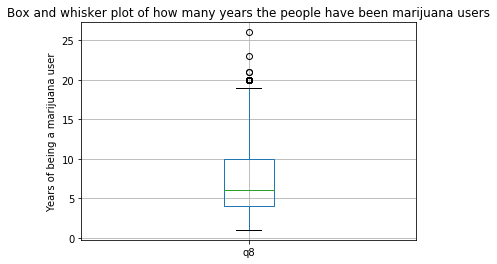

In [37]:
dataset.boxplot(column = ['q8'])
plt.ylabel('Years of being a marijuana user')
plt.title('Box and whisker plot of how many years the people have been marijuana users')
plt.show()

##### Check and fix outliers in data regarding price(q9) and quantity(q10) of recent purchase

Scatterplot corresponding to questions regarding price(R) and quantity(g) of recent purchase. We can see a massive outlier where a person claimed they bought 2000Kg of marijuana from a dealer for around R200000. We think this is really unrealistic compared to the data points in the bottom left so we will remove it.

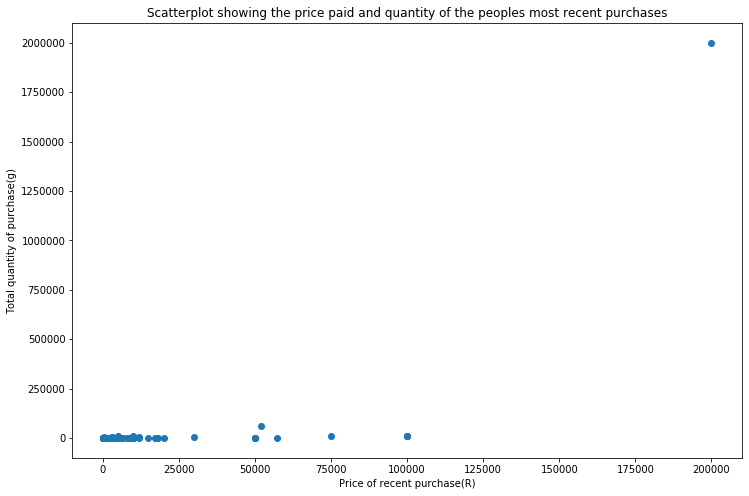

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(dataset['q9'], dataset['q10'], alpha=1)
plt.xlabel('Price of recent purchase(R)')
plt.ylabel('Total quantity of purchase(g)')
plt.title('Scatterplot showing the price paid and quantity of the peoples most recent purchases')
plt.show()

#remove outlier on both datasets
i = dataset[(dataset['q9'] > 125000) & (dataset['q10'] > 1250000)].index
dataset = dataset.drop(i)
i = smallCityTownDataset[(smallCityTownDataset['q9'] > 125000) & (smallCityTownDataset['q10'] > 1250000)].index
smallCityTownDataset = smallCityTownDataset.drop(i)

Scatterplot after removing the outlier above. We can see another outlier where a person claimed they bought 60Kg of marijuana from a dealer for around R55000. We think this is really unrealistic compared to the data points in the bottom of the plot so we will remove it.

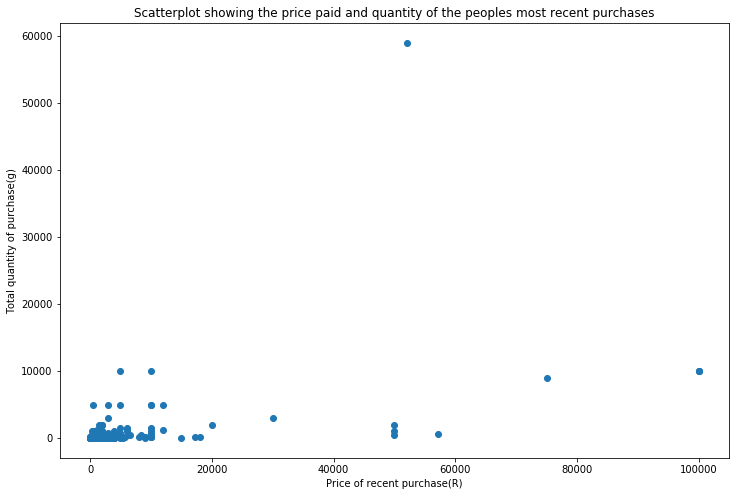

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(dataset['q9'], dataset['q10'], alpha=1)
plt.xlabel('Price of recent purchase(R)')
plt.ylabel('Total quantity of purchase(g)')
plt.title('Scatterplot showing the price paid and quantity of the peoples most recent purchases')
plt.show()

#remove outlier on both datasets
i = dataset[(dataset['q9'] > 50000) & (dataset['q10'] > 40000)].index
dataset = dataset.drop(i)
i = smallCityTownDataset[(smallCityTownDataset['q9'] > 50000) & (smallCityTownDataset['q10'] > 40000)].index
smallCityTownDataset = smallCityTownDataset.drop(i)

Scatterplot after removing the outliers above. We can see that most points have close surrounding data points so we think it's fine if we stop here. If necessary, we can remove more outliers later.

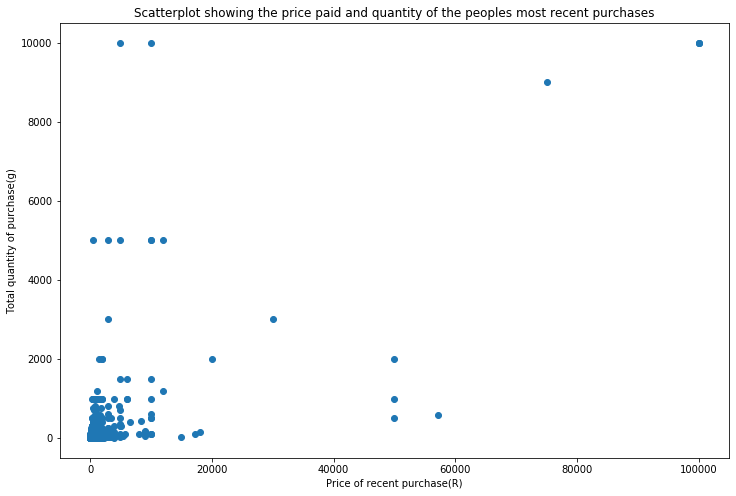

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(dataset['q9'], dataset['q10'], alpha=1)
plt.xlabel('Price of recent purchase(R)')
plt.ylabel('Total quantity of purchase(g)')
plt.title('Scatterplot showing the price paid and quantity of the peoples most recent purchases')
plt.show()

##### Check for outliers in data regarding price(q19_a) and quantity(q19_b) of other marijuana dealers sell

Scatterplot corresponding to questions regarding price(R) and quantity(g) of other marijuana dealers sell. We think the data looks okay so far except for the one data point on the top right of the plot, so we will remove that point. We want the general trend that the price goes up with the quantity which is mostly there. The price is also obviously dependent on the quality of the marijuana as well.

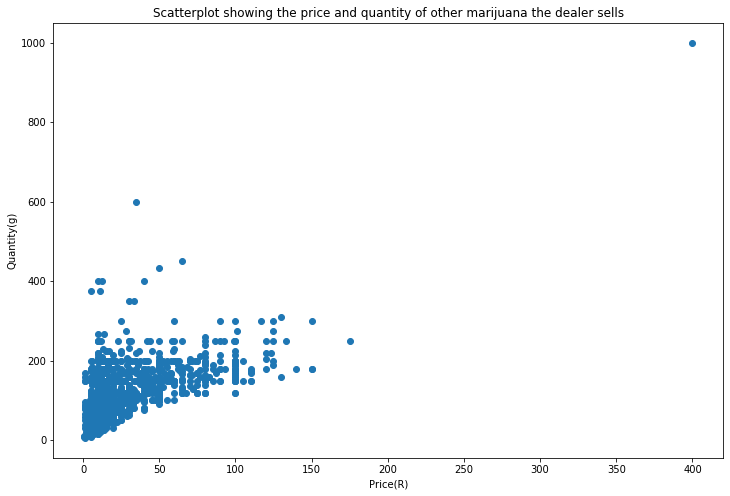

In [41]:
plt.figure(figsize=(12,8))
plt.scatter(dataset['q19_a'], dataset['q19_b'], alpha=1)
plt.xlabel('Price(R)')
plt.ylabel('Quantity(g)')
plt.title('Scatterplot showing the price and quantity of other marijuana the dealer sells')
plt.show()

#remove outlier on both datasets
i = dataset[(dataset['q19_a'] > 350) & (dataset['q19_b'] > 800)].index
dataset = dataset.drop(i)
i = smallCityTownDataset[(smallCityTownDataset['q19_a'] > 350) & (smallCityTownDataset['q19_b'] > 800)].index
smallCityTownDataset = smallCityTownDataset.drop(i)

The plot below looks much better now due to the fact that we removed the outlier. We can see that most points have close surrounding data points so we think it’s fine if we stop here. If necessary, we can remove more outliers later.

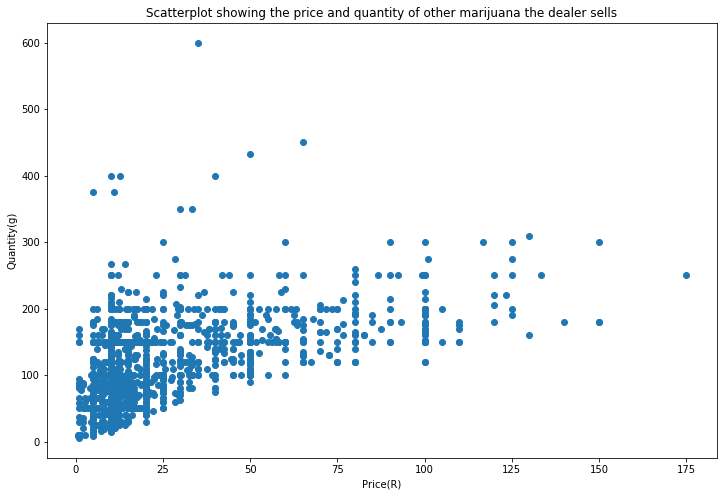

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(dataset['q19_a'], dataset['q19_b'], alpha=1)
plt.xlabel('Price(R)')
plt.ylabel('Quantity(g)')
plt.title('Scatterplot showing the price and quantity of other marijuana the dealer sells')
plt.show()

#### Data sense checks before we encode the categorical variables

##### Sense check data from q1 to q13

A quick look though the prints below we can see that every aspect of the first printed cell (normal dataset) is similar to that of the second printed cell (small city/town dataset) with the exception of q13. This is because we categorised the small cities/towns in their own category for the second dataset. Thus, what was printed makes sense.

In [43]:
print("####################################################################")   
print("Checking data quality of normal dataset")
print("####################################################################")   
for i in range(0,13):
    col = dataset.iloc[:,i].value_counts()
    print(col)
    print("----------------------------------------------------------------------------")

####################################################################
Checking data quality of normal dataset
####################################################################
I consent    2250
Name: q1, dtype: int64
----------------------------------------------------------------------------
Male           1612
Female          618
Undisclosed      20
Name: q2, dtype: int64
----------------------------------------------------------------------------
White          1555
Coloured        251
African         210
Undisclosed     110
Indian           88
Other            28
Asian             8
Name: q3, dtype: int64
----------------------------------------------------------------------------
20-29 years                           1450
30-39 years                            380
< 20 years (younger than 20 years)     203
40-49 years                            109
50 years and above                      96
Undisclosed                             12
Name: q4, dtype: int64
-----------------------

In [44]:
print("####################################################################")   
print("Checking data quality  of small city/town dataset")
print("####################################################################")   
for i in range(0,13):
    col = smallCityTownDataset.iloc[:,i].value_counts()
    print(col)
    print("----------------------------------------------------------------------------")

####################################################################
Checking data quality  of small city/town dataset
####################################################################
I consent    2250
Name: q1, dtype: int64
----------------------------------------------------------------------------
Male           1612
Female          618
Undisclosed      20
Name: q2, dtype: int64
----------------------------------------------------------------------------
White          1555
Coloured        251
African         210
Undisclosed     110
Indian           88
Other            28
Asian             8
Name: q3, dtype: int64
----------------------------------------------------------------------------
20-29 years                           1450
30-39 years                            380
< 20 years (younger than 20 years)     203
40-49 years                            109
50 years and above                      96
Undisclosed                             12
Name: q4, dtype: int64
-------------

##### Sense check data from q14

A quick look though the prints below we can see that every aspect of the first printed cell (normal dataset) is exactly the same to that of the second printed cell (small city/town dataset).

In [45]:
print("####################################################################")   
print("Checking data quality of normal dataset")
print("####################################################################") 
tot = 0
pnd = 0
for i in range(13,19):
    col = dataset.iloc[:,i].value_counts()
    print(col)
    if i != 18:
        tot = tot + col.to_numpy()[1]
    else:
        pnd = col.to_numpy()[1]
    print("----------------------------------------------------------------------------")
    
print("The total of the answered settlement types is " + str(tot))
tot = tot+pnd
print("Which with the people who chose not to answer gives a total of " + str(tot))

####################################################################
Checking data quality of normal dataset
####################################################################
0    1667
1     583
Name: q14_u, dtype: int64
----------------------------------------------------------------------------
1    1161
0    1089
Name: q14_r, dtype: int64
----------------------------------------------------------------------------
0    2229
1      21
Name: q14_i, dtype: int64
----------------------------------------------------------------------------
0    2195
1      55
Name: q14_rur, dtype: int64
----------------------------------------------------------------------------
0    2006
1     244
Name: q14_m, dtype: int64
----------------------------------------------------------------------------
0    2082
1     168
Name: q14_pnd, dtype: int64
----------------------------------------------------------------------------
The total of the answered settlement types is 1992
Which with the people who cho

In [46]:
print("####################################################################")   
print("Checking data quality  of small city/town dataset")
print("####################################################################")
tot = 0
pnd = 0
for i in range(13,19):
    col = smallCityTownDataset.iloc[:,i].value_counts()
    print(col)
    if i != 18:
        tot = tot + col.to_numpy()[1]
    else:
        pnd = col.to_numpy()[1]
    print("----------------------------------------------------------------------------")
    
print("The total of the answered settlement types is " + str(tot))
tot = tot+pnd
print("Which with the people who chose not to answer gives a total of " + str(tot))

####################################################################
Checking data quality  of small city/town dataset
####################################################################
0    1667
1     583
Name: q14_u, dtype: int64
----------------------------------------------------------------------------
1    1161
0    1089
Name: q14_r, dtype: int64
----------------------------------------------------------------------------
0    2229
1      21
Name: q14_i, dtype: int64
----------------------------------------------------------------------------
0    2195
1      55
Name: q14_rur, dtype: int64
----------------------------------------------------------------------------
0    2006
1     244
Name: q14_m, dtype: int64
----------------------------------------------------------------------------
0    2082
1     168
Name: q14_pnd, dtype: int64
----------------------------------------------------------------------------
The total of the answered settlement types is 1992
Which with the peop

##### Sense check data from q16 onwards

A quick look though the prints below we can see that every aspect of the first printed cell (normal dataset) is exactly the same to that of the second printed cell (small city/town dataset).

In [47]:
print("####################################################################")   
print("Checking data quality of normal dataset")
print("####################################################################") 
for i in range(19,26):
    col = dataset.iloc[:,i].value_counts()
    print(col)
    print("----------------------------------------------------------------------------")

####################################################################
Checking data quality of normal dataset
####################################################################
10.0    631
8.0     436
7.0     273
5.0     208
9.0     207
6.0     153
4.0      97
2.0      91
3.0      90
1.0      59
Name: q16, dtype: int64
----------------------------------------------------------------------------
More than 30 days    310
30                   308
7                    284
5                    157
2                    150
3                    149
14                   149
10                   120
4                     89
1                     74
20                    66
25                    59
15                    57
6                     56
21                    53
8                     26
12                    25
Undisclosed           23
9                     14
28                    12
16                    10
22                     9
24                     9
17                     9
2

In [48]:
print("####################################################################")   
print("Checking data quality  of small city/town dataset")
print("####################################################################")
for i in range(19,26):
    col = smallCityTownDataset.iloc[:,i].value_counts()
    print(col)
    print("----------------------------------------------------------------------------")

####################################################################
Checking data quality  of small city/town dataset
####################################################################
10.0    631
8.0     436
7.0     273
5.0     208
9.0     207
6.0     153
4.0      97
2.0      91
3.0      90
1.0      59
Name: q16, dtype: int64
----------------------------------------------------------------------------
More than 30 days    310
30                   308
7                    284
5                    157
2                    150
3                    149
14                   149
10                   120
4                     89
1                     74
20                    66
25                    59
15                    57
6                     56
21                    53
8                     26
12                    25
Undisclosed           23
9                     14
28                    12
16                    10
22                     9
24                     9
17              

#### Encoding categorical variables

##### Encoding the data set which still had small cities/towns not grouped

In the code below, the categorical columns will be encoded using the appropriate method. All integer and float columns will remain the same as it is not necessary to encode them. We will then export this new encoded dataset as a .csv named encodedDataset which will be imported and used in the following sections.

In [49]:
print("Original dataset before encoding")
display(dataset)
print("Shape: ",dataset.shape)
print("----------------------------------------------------------------------")
print("")

encodedDataset = dataset[['q1']].copy()

ohe.fit_transform(dataset[['q2']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q2_'+ i
    encodedDataset[colName] = ohe.fit_transform(dataset[['q2']])[:,index]
    index = index + 1 

ohe.fit_transform(dataset[['q3']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q3_'+ i
    encodedDataset[colName] = ohe.fit_transform(dataset[['q3']])[:,index]
    index = index + 1 
  
ohe.fit_transform(dataset[['q4']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q4_'+ i
    encodedDataset[colName] = ohe.fit_transform(dataset[['q4']])[:,index]
    index = index + 1 
       
ohe.fit_transform(dataset[['q5']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q5_'+ i
    encodedDataset[colName] = ohe.fit_transform(dataset[['q5']])[:,index]
    index = index + 1     
    
ohe.fit_transform(dataset[['q6']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q6_'+ i
    encodedDataset[colName] = ohe.fit_transform(dataset[['q6']])[:,index]
    index = index + 1 
    
ohe.fit_transform(dataset[['q7']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q7_'+ i
    encodedDataset[colName] = ohe.fit_transform(dataset[['q7']])[:,index]
    index = index + 1 
    
encodedDataset['q8'] = dataset[['q8']].copy()
encodedDataset['q9'] = dataset[['q9']].copy()
encodedDataset['q10'] = dataset[['q10']].copy()

ohe.fit_transform(dataset[['q11']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q11_'+ i
    encodedDataset[colName] = ohe.fit_transform(dataset[['q11']])[:,index]
    index = index + 1 
    
ohe.fit_transform(dataset[['q12']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q12_'+ i
    encodedDataset[colName] = ohe.fit_transform(dataset[['q12']])[:,index]
    index = index + 1

ohe.fit_transform(dataset[['q13']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q13_'+ i
    encodedDataset[colName] = ohe.fit_transform(dataset[['q13']])[:,index]
    index = index + 1
    
encodedDataset['q14_u'] = dataset[['q14_u']].copy()
encodedDataset['q14_r'] = dataset[['q14_r']].copy()
encodedDataset['q14_i'] = dataset[['q14_i']].copy()
encodedDataset['q14_rur'] = dataset[['q14_rur']].copy()
encodedDataset['q14_m'] = dataset[['q14_m']].copy()
encodedDataset['q14_pnd'] = dataset[['q14_pnd']].copy()
encodedDataset['q16'] = dataset[['q16']].copy()

ohe.fit_transform(dataset[['q17']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q17_'+ i
    encodedDataset[colName] = ohe.fit_transform(dataset[['q17']])[:,index]
    index = index + 1
    

ohe.fit_transform(dataset[['q18']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q18_'+ i
    encodedDataset[colName] = ohe.fit_transform(dataset[['q18']])[:,index]
    index = index + 1
    
encodedDataset['q19_a'] = dataset[['q19_a']].copy()
encodedDataset['q19_b'] = dataset[['q19_b']].copy()

ohe.fit_transform(dataset[['q20']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q20_'+ i
    encodedDataset[colName] = ohe.fit_transform(dataset[['q20']])[:,index]
    index = index + 1
    
ohe.fit_transform(dataset[['q21']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q21_'+ i
    encodedDataset[colName] = ohe.fit_transform(dataset[['q21']])[:,index]
    index = index + 1

print("New encoded dataset")
display(encodedDataset)
print("New encoded dataset information")
display(encodedDataset.info())
print("----------------------------------------------------------------------")

encodedDataset.to_csv('encodedDataset.csv', index = False)

Original dataset before encoding


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q14_rur,q14_m,q14_pnd,q16,q17,q18,q19_a,q19_b,q20,q21
0,I consent,Male,Other,< 20 years (younger than 20 years),R5000-R9999,2-3 times per week,2-3 times per week,5.0,200.0,10.0,...,0,0,0,10.0,2,Yes,10.000000,250.0,No,Yes
1,I consent,Female,Undisclosed,20-29 years,R10 000- R14 999,Everyday,2-3 times per month,6.0,500.0,10.0,...,0,0,0,6.0,30,Yes,NaN,130.0,No,No
2,I consent,Male,White,20-29 years,R5000-R9999,2-3 times per week,Once per month (or less),10.0,200.0,5.0,...,0,0,0,10.0,More than 30 days,Yes,10.869565,150.0,No,Yes
3,I consent,Female,White,< 20 years (younger than 20 years),< R1000 (less than R1000),2-3 times per month,Once per month (or less),4.0,400.0,6.0,...,0,0,0,8.0,14,Yes,50.000000,100.0,Yes,No
4,I consent,Male,White,20-29 years,R5000-R9999,Everyday,2-3 times per month,13.0,1200.0,40.0,...,0,0,0,8.0,30,No,NaN,NaN,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,I consent,Male,White,20-29 years,R1000- R4999,Everyday,2-3 times per month,3.0,250.0,10.0,...,0,0,0,7.0,5,Yes,15.000000,50.0,No,No
2250,I consent,Male,White,30-39 years,R30 000 and above,Everyday,Once per month (or less),10.0,3000.0,40.0,...,0,0,1,8.0,30,Yes,45.000000,140.0,No,No
2251,I consent,Male,White,30-39 years,R30 000 and above,Everyday,Once per month (or less),10.0,3000.0,40.0,...,0,0,1,8.0,30,Yes,45.000000,140.0,No,No
2252,I consent,Female,White,20-29 years,R1000- R4999,Everyday,2-3 times per month,4.0,300.0,10.0,...,0,0,0,3.0,12,Undisclosed,10.000000,NaN,Yes,No


Shape:  (2250, 26)
----------------------------------------------------------------------

New encoded dataset


,q1,q2_Female,q2_Male,q2_Undisclosed,q3_African,q3_Asian,q3_Coloured,q3_Indian,q3_Other,q3_Undisclosed,...,q18_Undisclosed,q18_Yes,q19_a,q19_b,q20_No,q20_Undisclosed,q20_Yes,q21_No,q21_Undisclosed,q21_Yes
0,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,10.000000,250.0,1.0,0.0,0.0,0.0,0.0,1.0
1,I consent,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,NaN,130.0,1.0,0.0,0.0,1.0,0.0,0.0
2,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,10.869565,150.0,1.0,0.0,0.0,0.0,0.0,1.0
3,I consent,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,50.000000,100.0,0.0,0.0,1.0,1.0,0.0,0.0
4,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,15.000000,50.0,1.0,0.0,0.0,1.0,0.0,0.0
2250,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,45.000000,140.0,1.0,0.0,0.0,1.0,0.0,0.0
2251,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,45.000000,140.0,1.0,0.0,0.0,1.0,0.0,0.0
2252,I consent,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,10.000000,NaN,0.0,0.0,1.0,1.0,0.0,0.0


New encoded dataset information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2250 entries, 0 to 2253
Columns: 259 entries, q1 to q21_Yes
dtypes: float64(252), int32(6), object(1)
memory usage: 4.4+ MB


None

----------------------------------------------------------------------


We can see from above that our end product non grouped small city/town dataset was encoded correctly. This is further evident if you look at the q2 column of the original dataset and the corresponding one hot encoded columns in the encoded dataset. Also due to all the processes and effort put into all the data wrangling aspects in this section, we think it is suitable to say that our data is in the best condition to be worked with and make proper inferences between features in the upcoming sections.

##### Encoding the data set where small cities/towns were grouped

In the code below, the categorical columns will be encoded using the appropriate method. All integer and float columns will remain the same as it is not necessary to encode them. We will then export this new encoded dataset as a .csv named encodedSmallCityTownDataset which will be imported and used in the following sections.

In [50]:
print("Original grouped small city/town dataset before encoding")
display(smallCityTownDataset)
print("Shape: ",smallCityTownDataset.shape)
print("----------------------------------------------------------------------")
print("")

encodedSmallCityTownDataset = smallCityTownDataset[['q1']].copy()

ohe.fit_transform(smallCityTownDataset[['q2']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q2_'+ i
    encodedSmallCityTownDataset[colName] = ohe.fit_transform(smallCityTownDataset[['q2']])[:,index]
    index = index + 1 

ohe.fit_transform(smallCityTownDataset[['q3']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q3_'+ i
    encodedSmallCityTownDataset[colName] = ohe.fit_transform(smallCityTownDataset[['q3']])[:,index]
    index = index + 1 


ohe.fit_transform(smallCityTownDataset[['q4']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q4_'+ i
    encodedSmallCityTownDataset[colName] = ohe.fit_transform(smallCityTownDataset[['q4']])[:,index]
    index = index + 1 
    
ohe.fit_transform(smallCityTownDataset[['q5']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q5_'+ i
    encodedSmallCityTownDataset[colName] = ohe.fit_transform(smallCityTownDataset[['q5']])[:,index]
    index = index + 1     
    
ohe.fit_transform(smallCityTownDataset[['q6']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q6_'+ i
    encodedSmallCityTownDataset[colName] = ohe.fit_transform(smallCityTownDataset[['q6']])[:,index]
    index = index + 1 
    
ohe.fit_transform(smallCityTownDataset[['q7']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q7_'+ i
    encodedSmallCityTownDataset[colName] = ohe.fit_transform(smallCityTownDataset[['q7']])[:,index]
    index = index + 1 
    
encodedSmallCityTownDataset['q8'] = smallCityTownDataset[['q8']].copy()
encodedSmallCityTownDataset['q9'] = smallCityTownDataset[['q9']].copy()
encodedSmallCityTownDataset['q10'] = smallCityTownDataset[['q10']].copy()

ohe.fit_transform(smallCityTownDataset[['q11']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q11_'+ i
    encodedSmallCityTownDataset[colName] = ohe.fit_transform(smallCityTownDataset[['q11']])[:,index]
    index = index + 1 
    
ohe.fit_transform(smallCityTownDataset[['q12']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q12_'+ i
    encodedSmallCityTownDataset[colName] = ohe.fit_transform(smallCityTownDataset[['q12']])[:,index]
    index = index + 1

ohe.fit_transform(smallCityTownDataset[['q13']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q13_'+ i
    encodedSmallCityTownDataset[colName] = ohe.fit_transform(smallCityTownDataset[['q13']])[:,index]
    index = index + 1
    
encodedSmallCityTownDataset['q14_u'] = smallCityTownDataset[['q14_u']].copy()
encodedSmallCityTownDataset['q14_r'] = smallCityTownDataset[['q14_r']].copy()
encodedSmallCityTownDataset['q14_i'] = smallCityTownDataset[['q14_i']].copy()
encodedSmallCityTownDataset['q14_rur'] = smallCityTownDataset[['q14_rur']].copy()
encodedSmallCityTownDataset['q14_m'] = smallCityTownDataset[['q14_m']].copy()
encodedSmallCityTownDataset['q14_pnd'] = smallCityTownDataset[['q14_pnd']].copy()

encodedSmallCityTownDataset['q16'] = smallCityTownDataset[['q16']].copy()

ohe.fit_transform(smallCityTownDataset[['q17']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q17_'+ i
    encodedSmallCityTownDataset[colName] = ohe.fit_transform(smallCityTownDataset[['q17']])[:,index]
    index = index + 1
    

ohe.fit_transform(smallCityTownDataset[['q18']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q18_'+ i
    encodedSmallCityTownDataset[colName] = ohe.fit_transform(smallCityTownDataset[['q18']])[:,index]
    index = index + 1
    
encodedSmallCityTownDataset['q19_a'] = smallCityTownDataset[['q19_a']].copy()
encodedSmallCityTownDataset['q19_b'] = smallCityTownDataset[['q19_b']].copy()

ohe.fit_transform(smallCityTownDataset[['q20']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q20_'+ i
    encodedSmallCityTownDataset[colName] = ohe.fit_transform(smallCityTownDataset[['q20']])[:,index]
    index = index + 1
    
ohe.fit_transform(smallCityTownDataset[['q21']])
index = 0
for i in ohe.categories_[0]:
    colName = 'q21_'+ i
    encodedSmallCityTownDataset[colName] = ohe.fit_transform(smallCityTownDataset[['q21']])[:,index]
    index = index + 1

print("New encoded grouped small city/town dataset")
display(encodedSmallCityTownDataset)
print("New encoded grouped small city/town dataset information")
display(encodedSmallCityTownDataset.info())
print("----------------------------------------------------------------------")

encodedSmallCityTownDataset.to_csv('encodedSmallCityTownDataset.csv', index = False)

Original grouped small city/town dataset before encoding


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q14_rur,q14_m,q14_pnd,q16,q17,q18,q19_a,q19_b,q20,q21
0,I consent,Male,Other,< 20 years (younger than 20 years),R5000-R9999,2-3 times per week,2-3 times per week,5.0,200.0,10.0,...,0,0,0,10.0,2,Yes,10.000000,250.0,No,Yes
1,I consent,Female,Undisclosed,20-29 years,R10 000- R14 999,Everyday,2-3 times per month,6.0,500.0,10.0,...,0,0,0,6.0,30,Yes,NaN,130.0,No,No
2,I consent,Male,White,20-29 years,R5000-R9999,2-3 times per week,Once per month (or less),10.0,200.0,5.0,...,0,0,0,10.0,More than 30 days,Yes,10.869565,150.0,No,Yes
3,I consent,Female,White,< 20 years (younger than 20 years),< R1000 (less than R1000),2-3 times per month,Once per month (or less),4.0,400.0,6.0,...,0,0,0,8.0,14,Yes,50.000000,100.0,Yes,No
4,I consent,Male,White,20-29 years,R5000-R9999,Everyday,2-3 times per month,13.0,1200.0,40.0,...,0,0,0,8.0,30,No,NaN,NaN,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,I consent,Male,White,20-29 years,R1000- R4999,Everyday,2-3 times per month,3.0,250.0,10.0,...,0,0,0,7.0,5,Yes,15.000000,50.0,No,No
2250,I consent,Male,White,30-39 years,R30 000 and above,Everyday,Once per month (or less),10.0,3000.0,40.0,...,0,0,1,8.0,30,Yes,45.000000,140.0,No,No
2251,I consent,Male,White,30-39 years,R30 000 and above,Everyday,Once per month (or less),10.0,3000.0,40.0,...,0,0,1,8.0,30,Yes,45.000000,140.0,No,No
2252,I consent,Female,White,20-29 years,R1000- R4999,Everyday,2-3 times per month,4.0,300.0,10.0,...,0,0,0,3.0,12,Undisclosed,10.000000,NaN,Yes,No


Shape:  (2250, 26)
----------------------------------------------------------------------

New encoded grouped small city/town dataset


,q1,q2_Female,q2_Male,q2_Undisclosed,q3_African,q3_Asian,q3_Coloured,q3_Indian,q3_Other,q3_Undisclosed,...,q18_Undisclosed,q18_Yes,q19_a,q19_b,q20_No,q20_Undisclosed,q20_Yes,q21_No,q21_Undisclosed,q21_Yes
0,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,10.000000,250.0,1.0,0.0,0.0,0.0,0.0,1.0
1,I consent,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,NaN,130.0,1.0,0.0,0.0,1.0,0.0,0.0
2,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,10.869565,150.0,1.0,0.0,0.0,0.0,0.0,1.0
3,I consent,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,50.000000,100.0,0.0,0.0,1.0,1.0,0.0,0.0
4,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,15.000000,50.0,1.0,0.0,0.0,1.0,0.0,0.0
2250,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,45.000000,140.0,1.0,0.0,0.0,1.0,0.0,0.0
2251,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,45.000000,140.0,1.0,0.0,0.0,1.0,0.0,0.0
2252,I consent,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,10.000000,NaN,0.0,0.0,1.0,1.0,0.0,0.0


New encoded grouped small city/town dataset information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2250 entries, 0 to 2253
Columns: 131 entries, q1 to q21_Yes
dtypes: float64(124), int32(6), object(1)
memory usage: 2.2+ MB


None

----------------------------------------------------------------------


We can see from above that our end product grouped small city/town dataset was encoded correctly. This is further evident if you look at the q2 column of the original dataset and the corresponding one hot encoded columns in the encoded dataset. Also due to all the processes and effort put into all the data wrangling aspects in this section, we think it is suitable to say that our data is in the best condition to be worked with and make proper inferences between features in the upcoming sections.

### To round off this data wrangling section we will run through the aspects of data quality to ensure our datasets conform to the standards:
* Our datasets conform to a standard format through all the rectifying done above, thus it is valid. 
* Our datasets are accurate as they were accrued from a trusted source described at the beginning of the notebook.
* All records except for useless records and outlying records are present so we think our datasets are pretty complete. We removed records in which people did not buy marijuana from dealers as it would not help us infer anything price or dealer wise.
* We ensured consistency by making sure our fields all were the correct datatypes. We also made our datasets more consistent by fixing the errors people made when entering their city/town. Thus, now that field can be used for inference.
* When the data was collected in the manner of the survey. They made sure to specify whenever an answer was needed price or quantity wise that the people should enter it in the correct units which are Rands and grams. The other fields are just categorical so we can conclude now that our data is uniform.

In [51]:
display(dataset)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q14_rur,q14_m,q14_pnd,q16,q17,q18,q19_a,q19_b,q20,q21
0,I consent,Male,Other,< 20 years (younger than 20 years),R5000-R9999,2-3 times per week,2-3 times per week,5.0,200.0,10.0,...,0,0,0,10.0,2,Yes,10.000000,250.0,No,Yes
1,I consent,Female,Undisclosed,20-29 years,R10 000- R14 999,Everyday,2-3 times per month,6.0,500.0,10.0,...,0,0,0,6.0,30,Yes,NaN,130.0,No,No
2,I consent,Male,White,20-29 years,R5000-R9999,2-3 times per week,Once per month (or less),10.0,200.0,5.0,...,0,0,0,10.0,More than 30 days,Yes,10.869565,150.0,No,Yes
3,I consent,Female,White,< 20 years (younger than 20 years),< R1000 (less than R1000),2-3 times per month,Once per month (or less),4.0,400.0,6.0,...,0,0,0,8.0,14,Yes,50.000000,100.0,Yes,No
4,I consent,Male,White,20-29 years,R5000-R9999,Everyday,2-3 times per month,13.0,1200.0,40.0,...,0,0,0,8.0,30,No,NaN,NaN,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,I consent,Male,White,20-29 years,R1000- R4999,Everyday,2-3 times per month,3.0,250.0,10.0,...,0,0,0,7.0,5,Yes,15.000000,50.0,No,No
2250,I consent,Male,White,30-39 years,R30 000 and above,Everyday,Once per month (or less),10.0,3000.0,40.0,...,0,0,1,8.0,30,Yes,45.000000,140.0,No,No
2251,I consent,Male,White,30-39 years,R30 000 and above,Everyday,Once per month (or less),10.0,3000.0,40.0,...,0,0,1,8.0,30,Yes,45.000000,140.0,No,No
2252,I consent,Female,White,20-29 years,R1000- R4999,Everyday,2-3 times per month,4.0,300.0,10.0,...,0,0,0,3.0,12,Undisclosed,10.000000,NaN,Yes,No


In [52]:
display(smallCityTownDataset)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q14_rur,q14_m,q14_pnd,q16,q17,q18,q19_a,q19_b,q20,q21
0,I consent,Male,Other,< 20 years (younger than 20 years),R5000-R9999,2-3 times per week,2-3 times per week,5.0,200.0,10.0,...,0,0,0,10.0,2,Yes,10.000000,250.0,No,Yes
1,I consent,Female,Undisclosed,20-29 years,R10 000- R14 999,Everyday,2-3 times per month,6.0,500.0,10.0,...,0,0,0,6.0,30,Yes,NaN,130.0,No,No
2,I consent,Male,White,20-29 years,R5000-R9999,2-3 times per week,Once per month (or less),10.0,200.0,5.0,...,0,0,0,10.0,More than 30 days,Yes,10.869565,150.0,No,Yes
3,I consent,Female,White,< 20 years (younger than 20 years),< R1000 (less than R1000),2-3 times per month,Once per month (or less),4.0,400.0,6.0,...,0,0,0,8.0,14,Yes,50.000000,100.0,Yes,No
4,I consent,Male,White,20-29 years,R5000-R9999,Everyday,2-3 times per month,13.0,1200.0,40.0,...,0,0,0,8.0,30,No,NaN,NaN,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,I consent,Male,White,20-29 years,R1000- R4999,Everyday,2-3 times per month,3.0,250.0,10.0,...,0,0,0,7.0,5,Yes,15.000000,50.0,No,No
2250,I consent,Male,White,30-39 years,R30 000 and above,Everyday,Once per month (or less),10.0,3000.0,40.0,...,0,0,1,8.0,30,Yes,45.000000,140.0,No,No
2251,I consent,Male,White,30-39 years,R30 000 and above,Everyday,Once per month (or less),10.0,3000.0,40.0,...,0,0,1,8.0,30,Yes,45.000000,140.0,No,No
2252,I consent,Female,White,20-29 years,R1000- R4999,Everyday,2-3 times per month,4.0,300.0,10.0,...,0,0,0,3.0,12,Undisclosed,10.000000,NaN,Yes,No


## Exploratory Analysis <a class="anchor" id="Exploratory-Analysis"></a>

Importing encoded datasets

In [53]:
dataset = pd.read_csv("encodedDataset.csv")
smallCityTownDataset = pd.read_csv("encodedSmallCityTownDataset.csv")
display(dataset)
display(smallCityTownDataset)

,q1,q2_Female,q2_Male,q2_Undisclosed,q3_African,q3_Asian,q3_Coloured,q3_Indian,q3_Other,q3_Undisclosed,...,q18_Undisclosed,q18_Yes,q19_a,q19_b,q20_No,q20_Undisclosed,q20_Yes,q21_No,q21_Undisclosed,q21_Yes
0,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,10.000000,250.0,1.0,0.0,0.0,0.0,0.0,1.0
1,I consent,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,NaN,130.0,1.0,0.0,0.0,1.0,0.0,0.0
2,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,10.869565,150.0,1.0,0.0,0.0,0.0,0.0,1.0
3,I consent,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,50.000000,100.0,0.0,0.0,1.0,1.0,0.0,0.0
4,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,15.000000,50.0,1.0,0.0,0.0,1.0,0.0,0.0
2246,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,45.000000,140.0,1.0,0.0,0.0,1.0,0.0,0.0
2247,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,45.000000,140.0,1.0,0.0,0.0,1.0,0.0,0.0
2248,I consent,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,10.000000,NaN,0.0,0.0,1.0,1.0,0.0,0.0


,q1,q2_Female,q2_Male,q2_Undisclosed,q3_African,q3_Asian,q3_Coloured,q3_Indian,q3_Other,q3_Undisclosed,...,q18_Undisclosed,q18_Yes,q19_a,q19_b,q20_No,q20_Undisclosed,q20_Yes,q21_No,q21_Undisclosed,q21_Yes
0,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,10.000000,250.0,1.0,0.0,0.0,0.0,0.0,1.0
1,I consent,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,NaN,130.0,1.0,0.0,0.0,1.0,0.0,0.0
2,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,10.869565,150.0,1.0,0.0,0.0,0.0,0.0,1.0
3,I consent,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,50.000000,100.0,0.0,0.0,1.0,1.0,0.0,0.0
4,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,15.000000,50.0,1.0,0.0,0.0,1.0,0.0,0.0
2246,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,45.000000,140.0,1.0,0.0,0.0,1.0,0.0,0.0
2247,I consent,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,45.000000,140.0,1.0,0.0,0.0,1.0,0.0,0.0
2248,I consent,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,10.000000,NaN,0.0,0.0,1.0,1.0,0.0,0.0


Helper function for plotting

In [54]:
def get_indeces(string,arr):
    indeces = []
    count = 0
    for val in arr:
        if string in val:
            indeces.append(count)
        count +=1
    return indeces

#### Scatterplot Matrix and Correlation Matrix
We now plot the correlation coefficients and the scatterplot matrix of the variables in the dataset to see if there are any relationships between variables.


In [55]:
# fig, ax = plt.subplots()
columns = dataset.columns.tolist()
indeces = get_indeces("q5",columns)
# indeces2 = get_indeces("q6",columns)
# indeces3 = get_indeces("q8",columns)
indeces4 = get_indeces("q9",columns)
indeces5 = get_indeces("q10",columns)
indeces = indeces4 + indeces5 + indeces

data = dataset.iloc[:,indeces]

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,q9,q10,q5_< R1000 (less than R1000),q5_R10 000- R14 999,q5_R1000- R4999,q5_R15 000- R19 999,q5_R20 000- R24 999,q5_R25 000- R29 999,q5_R30 000 and above,q5_R5000-R9999,q5_Undisclosed
q9,1.000000,0.695862,0.017494,-0.019272,-0.035065,0.009513,0.050630,-0.003772,0.031180,-0.016484,-0.003349
q10,0.695862,1.000000,0.012598,-0.026739,-0.004717,0.009048,0.023535,0.008973,0.001674,-0.007311,nan
q5_< R1000 (less than R1000),0.017494,0.012598,1.000000,-0.131177,-0.201558,-0.100329,-0.087539,-0.065296,-0.107828,-0.163771,-0.013823
q5_R10 000- R14 999,-0.019272,-0.026739,-0.131177,1.000000,-0.246448,-0.122674,-0.107035,-0.079838,-0.131842,-0.200245,-0.016901
q5_R1000- R4999,-0.035065,-0.004717,-0.201558,-0.246448,1.000000,-0.188493,-0.164464,-0.122675,-0.202580,-0.307683,-0.025969
q5_R15 000- R19 999,0.009513,0.009048,-0.100329,-0.122674,-0.188493,1.000000,-0.081865,-0.061064,-0.100838,-0.153155,-0.012927
q5_R20 000- R24 999,0.050630,0.023535,-0.087539,-0.107035,-0.164464,-0.081865,1.000000,-0.053279,-0.087983,-0.133631,-0.011279
q5_R25 000- R29 999,-0.003772,0.008973,-0.065296,-0.079838,-0.122675,-0.061064,-0.053279,1.000000,-0.065627,-0.099676,-0.008413
q5_R30 000 and above,0.031180,0.001674,-0.107828,-0.131842,-0.202580,-0.100838,-0.087983,-0.065627,1.000000,-0.164601,-0.013893
q5_R5000-R9999,-0.016484,-0.007311,-0.163771,-0.200245,-0.307683,-0.153155,-0.133631,-0.099676,-0.164601,1.000000,-0.021101


We find that there is a good correlation between questions 9 and 10. These relate to the total price paid and total amount of Marijuana purchased and will be explored further.

We now plot the scatter matrix of the data.

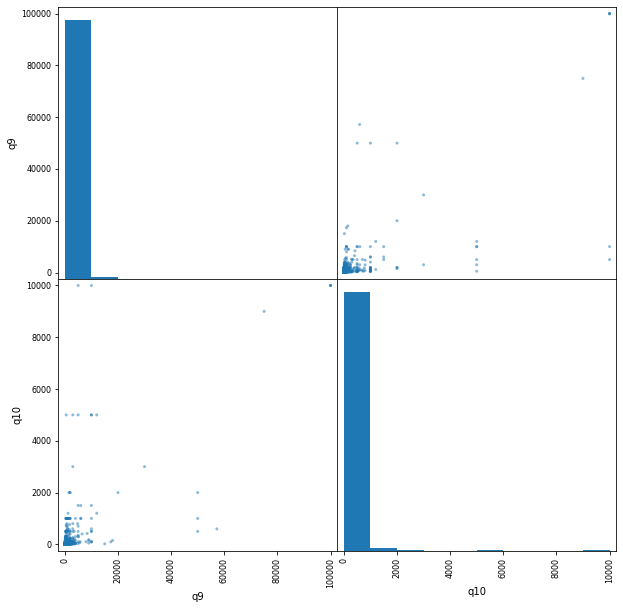

In [56]:
pd.plotting.scatter_matrix(data[['q9','q10']],figsize=(10,10))
plt.show()

##### Number of Consumers by Province
Looking at the probability mass function of the data based on Province. We are hoping to see which of the provinces make up most of our population, so we can explore them further.

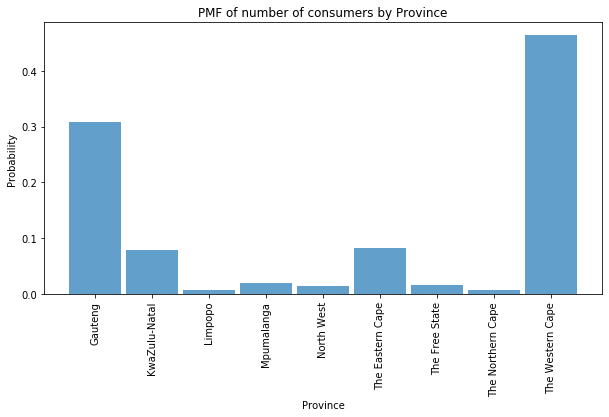

In [57]:
columns = dataset.columns.tolist()
indeces = get_indeces("q12",columns)

consProv = dataset.iloc[:,indeces]

labels = consProv.columns.tolist()
for i in range(len(labels)):
    labels[i] = labels[i][4:]

consProv = consProv[consProv==1].count()/consProv.count()

# display(consProv)
plt.figure(figsize=(10,5))
plt.bar(labels,consProv,width=0.9,alpha=0.7)
plt.xticks(rotation=90)
plt.title('PMF of number of consumers by Province')
plt.xlabel('Province')
plt.ylabel('Probability')
plt.show()

The above is the PMF of consumers by provinces. The goal of this graph is to see the relative proportion of consumers by each province. We can see that the top four provinces for cannabis consumption in this survey are Western Cape, Gauteng, Eastern Cape and KwaZulu-Natal. This makes sense given the fact that these are the four largest provinces by population. Since these 4 provinces make up most of the data set, we will focus on them. It is worthwhile to note however that there is an over representation of the Western Cape given it only has the second largest population. The Eastern Cape having a larger probability than KwaZulu-Natal is also notable since KwaZulu-Natal has a much larger population. The possible reasons may be the survey had a larger number of correspondents or that people in these provinces might consume more than average.

Now for each of the top 4 provinces, we look at the probabilty mass of the population in relation to the location where they reside. We hope to see which different locations make up the majority population. This might help us determine distribution patterns within the provinces.


In [58]:
plotData = smallCityTownDataset.copy()
columns = plotData.columns.tolist()
indeces = get_indeces("q12",columns)
indeces2 = get_indeces("q13",columns)
indeces += indeces2

provCity = smallCityTownDataset.iloc[:,indeces]

WC = provCity[provCity["q12_The Western Cape"]==1].sum()
WC = WC[WC>0]

KZN = provCity[provCity['q12_KwaZulu-Natal']==1].sum()
KZN = KZN[KZN>0]

EC = provCity[provCity['q12_The Eastern Cape']==1].sum()
EC = EC[EC>0]

GP = provCity[provCity['q12_Gauteng']==1].sum()
GP = GP[GP>0]

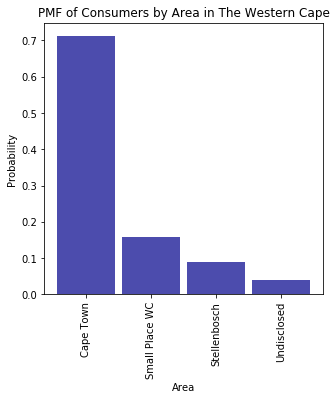

In [59]:
labels = WC.index.values.tolist()[1:]

for i in range(len(labels)):
    labels[i] = labels[i][4:]
probs = WC[1:]/WC[0]
# labels
fig = plt.figure(figsize=(5,5))
plt.title('PMF of Consumers by Area in The Western Cape')
plt.xlabel('Area')
plt.ylabel('Probability')
plt.xticks(rotation=90)

plt.bar(labels,probs,width=0.9,alpha=0.7,color="darkblue")
plt.show()

This graph shows the PMF of people by city/town in the Western Cape. The graph makes sense given that Cape Town is a very large city relative to other cities/towns in the Western Cape. Furthermore, we can see that small place WC makes up more than Stellenbosch. This would make sense given that the Western Cape has many towns that are not very large in population size such as Kysna, George, Plettenberg Bay, The Wils and Graaf-Reinet. 

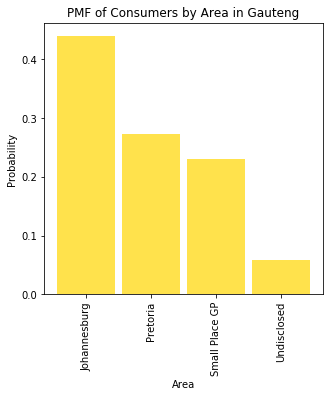

In [60]:
labels = GP.index.values.tolist()[1:]

for i in range(len(labels)):
    labels[i] = labels[i][4:]
probs = GP[1:]/GP[0]
# labels
fig = plt.figure(figsize=(5,5))
plt.title('PMF of Consumers by Area in Gauteng')
plt.xlabel('Area')
plt.ylabel('Probability')
plt.xticks(rotation=90)

plt.bar(labels,probs,width=0.9,alpha=0.7,color="gold") 
plt.show()

In this graph we see the PMF distribution of cannabis consumer by City/Town. The graph makes sense given that both Pretoria and Johannesburg are very large cities in South Africa. It is also logical given that Johannesburg has a higher population. Since there are many large towns and cities (Soweto being one) in Gauteng, that the cumulative would also be large and hence would be close to Pretoria in size. We can see that there is more of a spread of the city/town for those surveyed compared to the Western Cape.

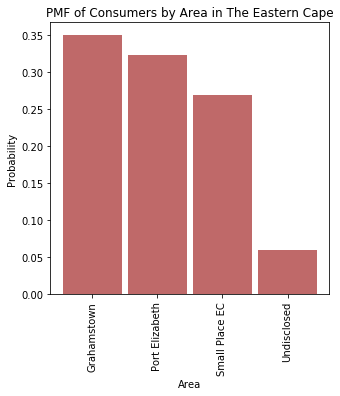

In [61]:
labels = EC.index.values.tolist()[1:]

for i in range(len(labels)):
    labels[i] = labels[i][4:]
probs = EC[1:]/EC[0]
# labels
fig = plt.figure(figsize=(5,5))
plt.title('PMF of Consumers by Area in The Eastern Cape')
plt.xlabel('Area')
plt.ylabel('Probability')
plt.xticks(rotation=90)

plt.bar(labels,probs,width=0.9,alpha=0.7,color="brown")
plt.show()

Here we can see that the PMF is a lot closer between the three cities/towns. What is different and unusual is that Grahamstown (now Makhanda) is overrepresented given its current size - which is less than 100,000 and was recorded at 67,264 in 2011 compared to Port Elizabeth (now Gqeberha) which in its Metro area has a population greater than 1,000,000 people. This suggests that either people in Makhanda are vastly more likely to consume cannabis or they are heavily overrepresented. Given the fact that Makhanda is a university town and that the Eastern Cape produces a large quantity of cannabis, it may be possible that they are overrepresented due to their higher proportion of consumption. The small place EC also confirms that towns in the Eastern cape make up more of the cannabis consumers than the average small town compared to Western Cape or Gauteng.

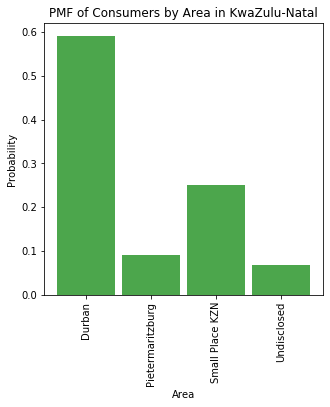

In [62]:
labels = KZN.index.values.tolist()[1:]

for i in range(len(labels)):
    labels[i] = labels[i][4:]
probs = KZN[1:]/KZN[0]
# labels
fig = plt.figure(figsize=(5,5))
plt.title('PMF of Consumers by Area in KwaZulu-Natal')
plt.xlabel('Area')
plt.ylabel('Probability')
plt.xticks(rotation=90)

plt.bar(labels,probs,width=0.9,alpha=0.7,color="green")
plt.show()

Here we see that Durban is a larger consumer of cannabis in KwaZulu-Natal amounting for more than 50% of the province. KwaZulu-Natal also has fewer large towns and cities outside of Durban as can be seen with population density maps of Durban. Durban also makes up a very large proportion of the province's population given it has 3,720,953(count from 2018) out of 11,531,628(estimate of 2020) people in KwaZulu-Natal. Given that it is much easier to survey people in population centres this proportion makes sense. Further since there are so many towns in KwaZulu-Natal the small place KZN making up the second largest proportion of KZN's cannabis consumption makes sense.

##### Average amount of Marijuana in grams purchased by income
From our correlation coefficient matrix, we found that there was a good relation between income brackets and quantity of marijuana purchased. We now plot the average amount of grams purchased against the different income brackets and explore the results.


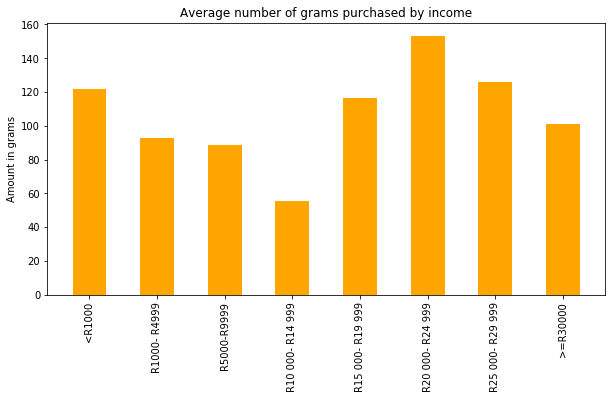

In [63]:
plotData = dataset.copy()
columns = plotData.columns.tolist()
indeces = get_indeces("q5",columns)
indeces2 = get_indeces("q10",columns)
indeces += indeces2

avgGramsIncome = dataset.iloc[:,indeces]
# avgGramsIncome
columns = ['q5_< R1000 (less than R1000)',
 'q5_R1000- R4999',
 'q5_R5000-R9999',
 'q5_R10 000- R14 999',
 'q5_R15 000- R19 999',
 'q5_R20 000- R24 999',
 'q5_R25 000- R29 999',
 'q5_R30 000 and above',
 'q5_Undisclosed',
 "q10"]

avgGramsIncome = avgGramsIncome.reindex(columns=columns)
labels = avgGramsIncome.columns.tolist()[:-1]

probs = []

for col in labels[:-1]:
    column = avgGramsIncome[[col,"q10"]]
    mean = column[column[col]==1].dropna()["q10"].mean()
    probs.append(mean)

for i in range(len(labels)):
    labels[i] = labels[i][3:]
labels[0] = "<R1000"
labels[-2] = ">=R30000"

labels = labels[:-1]

plt.figure(figsize=(10,5))
plt.title('Average number of grams purchased by income')
plt.xlabel(' ')
plt.ylabel('Amount in grams')
plt.xticks(rotation=90)
plt.bar(labels,probs,color="orange",width=0.5)
plt.show()

This graph shows the mean consumption (in grams) of cannabis by income range. Here we can see that the data is bimodal in its distribution. This is interesting as it implies that the consumption of cannabis (in grams) is high amongst those with less than R1000 monthly salary, slowly decreasing up until R15000-19999 monthly salary which further continues to increase until decreasing at R20000-25000 monthly salary. This is interesting since those making up the greatest consumption(R20000-24999) fall into the average salary in South Africa (referenced from https://businesstech.co.za/news/finance/386327/this-is-the-average-salary-in-south-africa-right-now-4/). There could be many reasons for this consumption pattern. Possibly those with less than R1000 are students who use allowances to consume cannabis. The average person (R20000-24999) being the highest (by number of grams) consumer of cannabis may indicate that the average South African cannabis consumer may be consuming significant amount of cannabis compared to the general public. The decrease between R1000-R15000 may be from people who cannot afford to purchase cannabis or did not have access to the survey possibly. As for the decrease in consumption from R25000 onwards, this may be due to a desire for higher quality instead of quantity or rather a general decrease in consumption for high income individuals.

#### Personal income and frequency of purchase
We calculate the total counts of different frequency usages of Marijuana and plot it against the income brackets. We hope to see whether there is a relationship between personal income and frequency of Marijuana use.


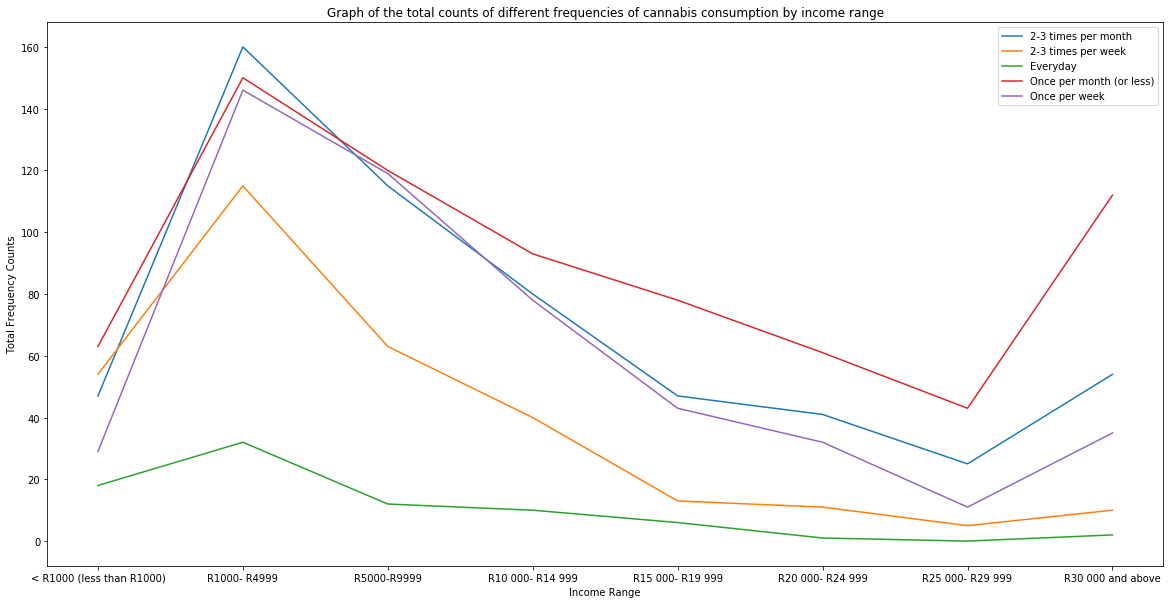

In [64]:
plotData = dataset.copy()

columns = plotData.columns.tolist()
indeces = get_indeces("q5",columns)
indeces2 = get_indeces("q7",columns)
q7_cols = plotData.iloc[:,indeces2].columns.tolist()
indeces += indeces2

avgConsPrice = dataset.iloc[:,indeces]
columns = ['q5_< R1000 (less than R1000)',
 'q5_R1000- R4999',
 'q5_R5000-R9999',
 'q5_R10 000- R14 999',
 'q5_R15 000- R19 999',
 'q5_R20 000- R24 999',
 'q5_R25 000- R29 999',
 'q5_R30 000 and above',
 'q5_Undisclosed']
for i in q7_cols:
    columns.append(i)

avgConsPrice = avgConsPrice.reindex(columns=columns)
avgConsPrice

unique = avgConsPrice.iloc[:,0:8].columns.tolist()

fig = plt.figure(figsize=(20,10))

arr_x = []

for item in unique:
    arr_x.append(item[3:])

arr_y1 = []
arr_y2 = []
arr_y3 = []
arr_y4 = []
arr_y5 = []
headings = []

for item in unique:
    arr = avgConsPrice.iloc[:,9:-1][avgConsPrice[item]==1].dropna()
    freq_counts = arr.sum()
    headings = freq_counts.index.values.tolist()
    for i in range(0,5):
        if i == 0:
            arr_y1.append(freq_counts[i])
        if i == 1:
            arr_y2.append(freq_counts[i])
        if i == 2:
            arr_y3.append(freq_counts[i])
        if i == 3:
            arr_y4.append(freq_counts[i])
        if i == 4:
            arr_y5.append(freq_counts[i])

plt.plot(arr_x,arr_y1,label=headings[0][3:])
plt.plot(arr_x,arr_y2,label=headings[1][3:])
plt.plot(arr_x,arr_y3,label=headings[2][3:])
plt.plot(arr_x,arr_y4,label=headings[3][3:])
plt.plot(arr_x,arr_y5,label=headings[4][3:])

plt.title('Graph of the total counts of different frequencies of cannabis consumption by income range')
plt.xlabel('Income Range')
plt.ylabel('Total Frequency Counts')
plt.legend()
plt.show()

We see that individuals who purchase marijuana more frequently are mainly of the lower income brackets. Individuals within the higher income bracket tend to purchase marijuana less frequently than those of a lower income bracket. This may be that there is a higher reliance on marijuana of lower income bracket individuals than higher income bracket individuals.

##### Amount consumed for price paid
We now explore the decile plot of the average Marijuana consumption by price paid. We aim to see what the general consumption patterns are for each group of individuals.


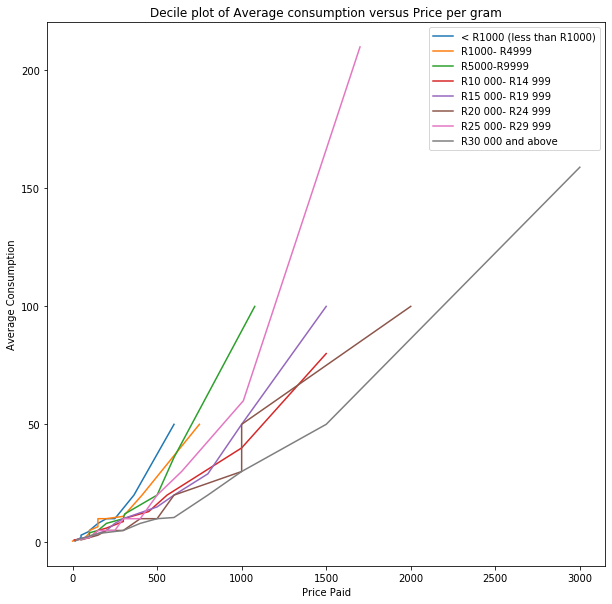

In [65]:
plotData = dataset.copy()

columns = plotData.columns.tolist()
indeces = get_indeces("q5",columns)
indeces3 = get_indeces("q9",columns)
indeces2 = get_indeces("q10",columns)
indeces += indeces2
indeces += indeces3

avgConsPrice = dataset.iloc[:,indeces]
# avgGramsIncome
columns = ['q5_< R1000 (less than R1000)',
 'q5_R1000- R4999',
 'q5_R5000-R9999',
 'q5_R10 000- R14 999',
 'q5_R15 000- R19 999',
 'q5_R20 000- R24 999',
 'q5_R25 000- R29 999',
 'q5_R30 000 and above',
 'q5_Undisclosed',
 "q9",
 "q10"]

avgConsPrice = avgConsPrice.reindex(columns=columns)
# avgConsPrice
unique = avgConsPrice.iloc[:,0:8].columns.tolist()

fig = plt.figure(figsize=(10,10))

for item in unique:
    arr = avgConsPrice[["q9","q10"]][avgConsPrice[item]==1].dropna().sort_values("q9")
    temp = []
    for i in range(0,10):
        point = np.array(arr.quantile(i/10))
        temp.append(point)
    temp=np.array(temp)
    #Plot
    label = item[3:]
    plt.plot(temp[:,0],temp[:,1],label=label)  
    
plt.title('Decile plot of Average consumption versus Price per gram')
plt.xlabel('Price Paid')
plt.ylabel('Average Consumption')
plt.legend()
plt.show()

The above graph is a decile plot of the average consumption(grams), with the price paid. The graph has grouped people by their monthly salary before plotting. The goal of this graph is to see what the general consumption patterns are for each group. We can see that the lower income groups (those with less than R5000-9999) consume the least cannabis and pay the least. This makes sense given that those earning the least also pay the least, but it is surprising to note that the highest consumers in the <R1000 category spend a significant portion of their monthly income on cannabis. Hence possibly giving further reason to assume they are students. For those in the R1000-4999 category we can see their consumption is quite close to that of the <R1000. In R5000-9999 we can see that the consumption in terms of grams rises much more sharply compared to price hinting that their consumption is possibly a lot higher but of a lower quality. The category of R15000-19999 contains some outliers it would appear given the vastly higher consumption compared to the other categories despite paying the same price. Outside of this we can see a general trend for those earning more than R10000, which is that they start to pay more for less cannabis and hence the consumption changes with regards to price starts to flatten yielding a lower gradient. Thus, we can assume with regards to the previous graph (showing mean consumption amount by income) that the highest consumers are possibly consuming less but are also consuming the most expensive cannabis.

#### CDF of income range
We now look at the Cumulative distribution frequency of the income ranges. We do this in hope to find if there is a disproportionate number of people earning more than the median income making up the survey.


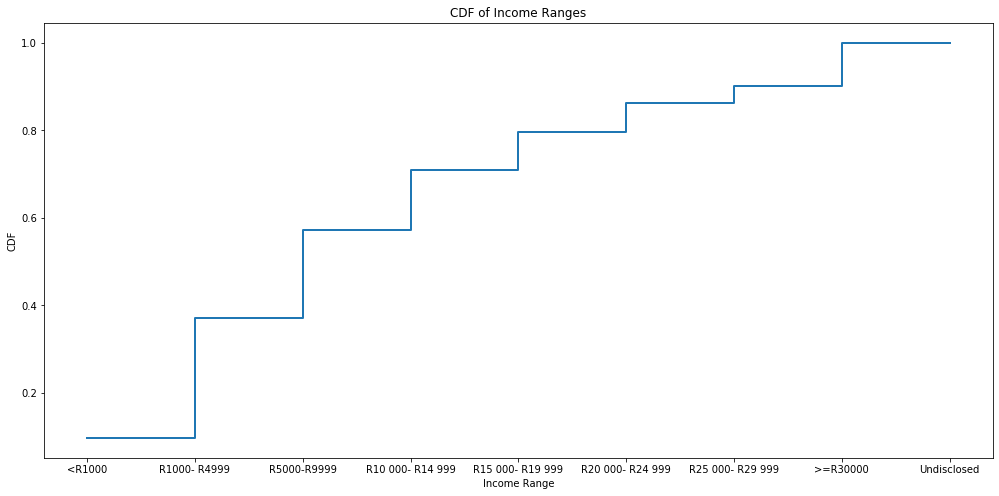

In [66]:
plotData = dataset.copy()

columns = plotData.columns.tolist()
indeces = get_indeces("q5",columns)

incomeRange =  plotData.iloc[:,indeces]
columns = ['q5_< R1000 (less than R1000)',
 'q5_R1000- R4999',
 'q5_R5000-R9999',
 'q5_R10 000- R14 999',
 'q5_R15 000- R19 999',
 'q5_R20 000- R24 999',
 'q5_R25 000- R29 999',
 'q5_R30 000 and above',
 'q5_Undisclosed']

incomeRange = incomeRange.reindex(columns=columns)

incomeRange = incomeRange.sum()/incomeRange.sum().sum()
# incomeRange

income_values = np.array(incomeRange)

cdf_vals = np.zeros(len(income_values))

for i in range(len(cdf_vals)):
    if i>0:
        cdf_vals[i] = cdf_vals[i-1]+income_values[i]
    else:
        cdf_vals[i] = income_values[i]

labels = incomeRange.index.values.tolist()
for i in range(len(labels)):
    labels[i] = labels[i][3:]
labels[0] = "<R1000"
labels[-2] = ">=R30000"

plt.figure(figsize=(17,8))
plt.xlabel('Income Range')
plt.ylabel('CDF')
plt.title("CDF of Income Ranges")
plt.plot(labels,cdf_vals,lw=2, drawstyle="steps-post")
plt.show()

This graph is just a CDF by income range category. We can see that those with less than R1000 make up the smallest amount whilst those in the R1000-4999 category make up the largest amount, followed by R5000-9999. This makes sense given that many South Africans are in this income range - based on the median salary (reference https://businesstech.co.za/news/wealth/336309/how-much-you-need-to-earn-each-month-to-be-in-the-richest-1-in-south-africa/). Thus we can also see there is a disproportionate number of people earning more than the median income making up the survey.

#### Price paid and quantity of different Quality Marijuana
We now explore the decile plot of different prices paid for different quality marijuana. We do this in hope to find who is most likely to purchase low, medium, or high quality marijuana.


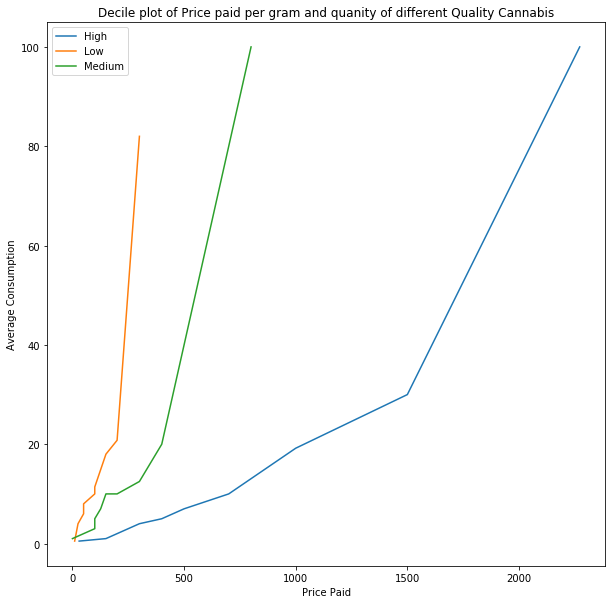

In [67]:
plotData = dataset.copy()

columns = plotData.columns.tolist()
indeces = get_indeces("q11",columns)
indeces3 = get_indeces("q9",columns)
indeces2 = get_indeces("q10",columns)
indeces += indeces2
indeces += indeces3

avgConsPrice = dataset.iloc[:,indeces]

unique = avgConsPrice.columns.tolist()[:-3]
# unique
fig = plt.figure(figsize=(10,10))

for item in unique:
    arr = avgConsPrice[["q9","q10"]][avgConsPrice[item]==1].dropna().sort_values("q9")
    temp = []
    for i in range(0,10):
        point = np.array(arr.quantile(i/10))
        temp.append(point)
    temp=np.array(temp)
    #Plot
    label = item[4:]
    plt.plot(temp[:,0],temp[:,1],label=label)  
    
    
plt.title('Decile plot of Price paid per gram and quanity of different Quality Cannabis')
plt.xlabel('Price Paid')
plt.ylabel('Average Consumption')
plt.legend()
plt.show()

This decile plot shows the average price paid and the amount the consumer spent per gram of cannabis. Thus, we can see many people consuming low and medium grade cannabis typically buy more cannabis for cheaper prices and prefer more cannabis over better cannabis. Those paying for high grade cannabis typically consume less at each decile than those consuming medium or low-grade cannabis, however they also pay vastly more in total. This should thus represent the higher income ranges spending habits with regards to cannabis usage.

## Matthew Model Fitting

#### Model Description
* Here we will analyze the price of various qualities(low, medium and high) of cannabis.
* The aim here will be to see if the effects of other continuous variables in the data set show clear price patterns.
***
#### Methodology
* We will break the data set up into 3 different main data sets for this model.
* Each data set will contain only one type of cannabis quality for example only low quality cannabis or only high quality cannabis.
* After this, each data set will be broken into 2 smaller ones, one for testing (20% of the entries) and the other for trainning (80% of the entries).
* Furthermore, it should be noted that the splitting of these data sets into trainning and testing will be done randomly - i.e a random sample of 20% of the entries will be made into the testing set for that quality of cannabis and the remaining 80% will be used to train.
***
#### Assumptions
* We assume that the continuous variables used in the modelling process provide enough information to approximate the prices with decent accuracy.
* Thus implying that much of the categorical data may possibly not be highly influential in prices of cannabis.
* I.e the price paid for cannabis is not necessarily effected by the race, age, province, gender or other categorical features of the person.
***
#### Data Splitting
Below we will split our data set that has been encoded into the three mutually exclusive sets of low, medium and high quality.
After this we will then split these sub sets into training and testing sets.

#### Model Selection

#### Residual Analysis

#### Sensibility Checks

#### Output of Model Fitting & Description

## Matthew Hypothesis Testing

#### Description of Tests


***
#### Description of Testing Methodology


***
#### Reasonable Assumptions

***
#### Hypothesis Test Calculations

## Matthew Interpreting Results

#### Discussion (include metrics, and give a good interpretation)

***

#### Did Results Meet Expectations 

***

